In [1]:

%run ../../load_magic/storage.py
%pprint
%matplotlib inline
from itertools import combinations
from math import cos, sin, pi, sqrt, atan
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import numpy as np
%who

DATA_FOLDER: ../data/
SAVES_FOLDER: ../saves/
Pretty printing has been turned OFF
Axes3D	 DATA_CSV_FOLDER	 DATA_FOLDER	 DBSCAN	 ENCODING_TYPE	 PCA	 SAVES_CSV_FOLDER	 SAVES_FOLDER	 SAVES_PICKLE_FOLDER	 
atan	 attempt_to_pickle	 combinations	 cos	 csv	 load_csv	 load_dataframes	 load_object	 mcolors	 
np	 os	 pd	 pi	 pickle	 plt	 save_dataframes	 sin	 sqrt	 
store_objects	 sys	 


In [2]:

def colors_dict_to_dataframe(colors_dict):
    columns_list = ['Red', 'Green', 'Blue']
    rows_list = []
    index_list = []
    for base_name, color_tuple in colors_dict.items():
        row_dict = {}
        index_list.append(base_name)
        for i, color_value in enumerate(columns_list):
            row_dict[color_value] = color_tuple[i]
        rows_list.append(row_dict)
    df = pd.DataFrame(rows_list, columns=columns_list, index=index_list)
    
    return df

In [3]:

def show_3d_plot(three_d_df, z_column='Red', x_column='Green', y_column='Blue'):
    fig = plt.figure(figsize=(18, 8))
    ax = fig.add_subplot(111, projection='3d', autoscale_on=True)
    xlabel_text = ax.set_xlabel(x_column)
    ylabel_text = ax.set_ylabel(y_column)
    zlabel_text = ax.set_zlabel(z_column)
    columns_list = [x_column, y_column, z_column]
    df = three_d_df[columns_list].dropna(axis='index', how='any')
    pca_ndarray = df.values
    path_collection = ax.scatter(pca_ndarray[:, 0], pca_ndarray[:, 1],
                                 pca_ndarray[:, 2], alpha=0.75, c=df.index)
    title_text = 'Scatterplot of the {}, {}, and {} Data'
    text_obj = ax.set_title(title_text.format(x_column, y_column, z_column))

In [15]:

def show_face_proximity(distance_df):
    for row_index, row_series in distance_df.iterrows():
        tuple_list = sorted(row_series.to_dict().items(), key=lambda x: x[1])
        if tuple_list[0][1] == 0.0:
            print('{} is in the {} corner'.format(row_index, tuple_list[0][0].split('_')[2]))
        else:
            corners_list = tuple_list[:3]
            face_set = set([corners_list[0][0].split('_')[2], corners_list[1][0].split('_')[2], corners_list[2][0].split('_')[2]])
            if face_set in kryg_face_set_list:
                print('{} is nearest the black-red-yellow-green face'.format(row_index))
            elif face_set in krmb_face_set_list:
                print('{} is nearest the black-red-magenta-blue face'.format(row_index))
            elif face_set in kbcg_face_set_list:
                print('{} is nearest the black-blue-cyan-green face'.format(row_index))
            elif face_set in wcgy_face_set_list:
                print('{} is nearest the white-cyan-green-yellow face'.format(row_index))
            elif face_set in wcbm_face_set_list:
                print('{} is nearest the white-cyan-blue-magenta face'.format(row_index))
            elif face_set in wyrm_face_set_list:
                print('{} is nearest the white-yellow-red-magenta face'.format(row_index))
            else:
                print('{} is nearest the {} face'.format(row_index, '-'.join(list(face_set))))

In [16]:

def get_face_dictionary(distance_df):
    face_dictionary = {}
    for row_index, row_series in distance_df.iterrows():
        tuple_list = sorted(row_series.to_dict().items(), key=lambda x: x[1])
        if tuple_list[0][1] == 0.0:
            face_dictionary[row_index] = tuple_list[0][0].split('_')[2]
        else:
            corners_list = tuple_list[:3]
            face_set = set([corners_list[0][0].split('_')[2], corners_list[1][0].split('_')[2], corners_list[2][0].split('_')[2]])
            if face_set in kryg_face_set_list:
                face_dictionary[row_index] = 'black-red-yellow-green'
            elif face_set in krmb_face_set_list:
                face_dictionary[row_index] = 'black-red-magenta-blue'
            elif face_set in kbcg_face_set_list:
                face_dictionary[row_index] = 'black-blue-cyan-green'
            elif face_set in wcgy_face_set_list:
                face_dictionary[row_index] = 'white-cyan-green-yellow'
            elif face_set in wcbm_face_set_list:
                face_dictionary[row_index] = 'white-cyan-blue-magenta'
            elif face_set in wyrm_face_set_list:
                face_dictionary[row_index] = 'white-yellow-red-magenta'
            else:
                face_dictionary[row_index] = '-'.join(list(face_set))
    
    return face_dictionary

In [17]:

def distance_from_kryg_face(old_tuple):
    green_diff = 0.5 - old_tuple[0]
    red_diff = 0.5 - old_tuple[2]
    
    return sqrt(green_diff**2 + old_tuple[1]**2 + red_diff**2)

In [18]:

def distance_from_krmb_face(old_tuple):
    blue_diff = 0.5 - old_tuple[1]
    red_diff = 0.5 - old_tuple[2]
    
    return sqrt(old_tuple[0]**2 + blue_diff**2 + red_diff**2)

In [19]:

def distance_from_kbcg_face(old_tuple):
    green_diff = 0.5 - old_tuple[0]
    blue_diff = 0.5 - old_tuple[1]
    
    return sqrt(green_diff**2 + blue_diff**2 + old_tuple[2]**2)

In [20]:

def distance_from_wcgy_face(old_tuple):
    green_diff = 1.0 - old_tuple[0]
    blue_diff = 0.5 - old_tuple[1]
    red_diff = 0.5 - old_tuple[2]
    
    return sqrt(green_diff**2 + blue_diff**2 + red_diff**2)

In [21]:

def distance_from_wcbm_face(old_tuple):
    green_diff = 0.5 - old_tuple[0]
    blue_diff = 1.0 - old_tuple[1]
    red_diff = 0.5 - old_tuple[2]
    
    return sqrt(green_diff**2 + blue_diff**2 + red_diff**2)

In [22]:

def distance_from_wyrm_face(old_tuple):
    green_diff = 0.5 - old_tuple[0]
    blue_diff = 0.5 - old_tuple[1]
    red_diff = 1.0 - old_tuple[2]
    
    return sqrt(green_diff**2 + blue_diff**2 + red_diff**2)

In [23]:

def display_test_colors(test_list, saeculum_title, face_title, nearness_str='far from',
                        color_dict=mcolors.XKCD_COLORS, color_title='XKCD',
                        face_point='Face'):
    print(test_list)
    plot_colortable(colors_dict={name: color for name, color in color_dict.items() if name in [name for distance, name in test_list]},
                    title='{} {} Colors, {} the {} {}'.format(color_title, saeculum_title, nearness_str, face_title, face_point),
                    sort_colors=True, emptycols=0)

In [24]:

def get_distance_dataframe(colors_df, color_title='XKCD'):
    rows_list = []
    columns_list = ['color_title', 'distance_from_white', 'distance_from_black',
                    'distance_from_red', 'distance_from_green', 'distance_from_blue',
                    'distance_from_magenta', 'distance_from_yellow', 'distance_from_cyan',
                    'distance_from_kryg_face', 'distance_from_krmb_face', 'distance_from_kbcg_face',
                    'distance_from_wcgy_face', 'distance_from_wcbm_face', 'distance_from_wyrm_face']
    index_list = []
    for row_index, row_series in colors_df.iterrows():
        green_value = row_series['Green']
        blue_value = row_series['Blue']
        red_value = row_series['Red']
        row_tuple = (green_value, blue_value, red_value)
        row_dict = {}
        row_dict['color_title'] = color_title
        row_dict['distance_from_white'] = distance_from_white(row_tuple)
        row_dict['distance_from_black'] = distance_from_black(row_tuple)
        row_dict['distance_from_red'] = distance_from_red(row_tuple)
        row_dict['distance_from_green'] = distance_from_green(row_tuple)
        row_dict['distance_from_blue'] = distance_from_blue(row_tuple)
        row_dict['distance_from_magenta'] = distance_from_magenta(row_tuple)
        row_dict['distance_from_yellow'] = distance_from_yellow(row_tuple)
        row_dict['distance_from_cyan'] = distance_from_cyan(row_tuple)
        row_dict['distance_from_kryg_face'] = distance_from_kryg_face(row_tuple)
        row_dict['distance_from_krmb_face'] = distance_from_krmb_face(row_tuple)
        row_dict['distance_from_kbcg_face'] = distance_from_kbcg_face(row_tuple)
        row_dict['distance_from_wcgy_face'] = distance_from_wcgy_face(row_tuple)
        row_dict['distance_from_wcbm_face'] = distance_from_wcbm_face(row_tuple)
        row_dict['distance_from_wyrm_face'] = distance_from_wyrm_face(row_tuple)
        rows_list.append(row_dict)
        index_list.append(row_index)
    distance_df = pd.DataFrame(rows_list, columns=columns_list, index=index_list)
    
    return distance_df

In [25]:

colors_dict = {name: mcolors.to_rgb(color) for name, color in mcolors.XKCD_COLORS.items()}
xkcd_colors_df = colors_dict_to_dataframe(colors_dict)
xkcd_distance_df = get_distance_dataframe(xkcd_colors_df, color_title='XKCD')
def show_color_proximity(distance_df=xkcd_distance_df, color_dict=mcolors.XKCD_COLORS, color_title='XKCD', color_str='Red',
                         saeculum_title='Reformation', nearness_str='close to'):
    distance_dict = {}
    for name, color in color_dict.items():
        mask_series = (distance_df.index == name)
        distance_list = distance_df[mask_series]['distance_from_{}'.format(color_str.lower())].tolist()
        if len(distance_list) == 1:
            distance_dict[name] = distance_list[0]
    color_tuple_list = sorted((distance, name) for name, distance in distance_dict.items())
    test_list = color_tuple_list[:32]
    display_test_colors(test_list=test_list, saeculum_title=saeculum_title, face_title=color_str, nearness_str=nearness_str, color_dict=color_dict,
                        color_title=color_title, face_point='Corner')

In [26]:

kryg_face_set_list = get_face_set_list(['black', 'red', 'yellow', 'green'])
krmb_face_set_list = get_face_set_list(['black', 'red', 'magenta', 'blue'])
kbcg_face_set_list = get_face_set_list(['black', 'blue', 'cyan', 'green'])
wcgy_face_set_list = get_face_set_list(['white', 'cyan', 'green', 'yellow'])
wcbm_face_set_list = get_face_set_list(['white', 'cyan', 'blue', 'magenta'])
wyrm_face_set_list = get_face_set_list(['white', 'yellow', 'red', 'magenta'])

In [27]:

patriline_df = load_object('patriline_df')
min_year = patriline_df['year_of_birth'].min()
generations_df = load_object('generations_df')

In [28]:

patriline_df.sample(5).T

patriarch_name,David George Babbitt,"(No Name), Sr.","Elkanah Babbitt, I","Joseph Robert Babbitt, Sr.",William David Babbitt
year_of_birth,1961,1518,1665,1891,1791
year_of_death,NaN,1585,1735,1968,1861
generation_name,13th,Reprisal,Glorious,Lost,Compromise
date_of_birth,12-Jul-61,estimated between 1485 and 1545,"December 15, 1665","May 04, 1891","October 26, 1791"
place_of_birth,"Flagstaff, AZ, United States",Unknown Place of Birth,"Taunton, Bristol County, Massachusetts, United...","Flagstaff, Coconino, AZ, United States","Berkshire, Berkshire, MA, United States"
birth_longitude,35.1813,NaN,41.9164,35.1813,42.3931
birth_latitude,-111.643,NaN,-71.1544,-111.643,-73.5086
date_of_death,Not yet,Unknown Date of Death,"December 22, 1735 (70)","March 19, 1968 (76)","May 28, 1861 (69)"
place_of_death,Not anywhere,Unknown Place of Death,"Berkley, Bristol County, Province of Massachus...","Flagstaff, Coconino, AZ, U","Berkshire, Berkshire, MA, United States"
death_longitude,NaN,NaN,41.826,35.1813,42.3931



# XKCD

In [29]:

xkcd_colors_df.sample(5).T

,xkcd:flat green,xkcd:olive,xkcd:blurple,xkcd:sand yellow,xkcd:bluegreen
Red,0.411765,0.431373,0.333333,0.988235,0.003922
Green,0.615686,0.458824,0.223529,0.882353,0.478431
Blue,0.298039,0.054902,0.800000,0.400000,0.474510


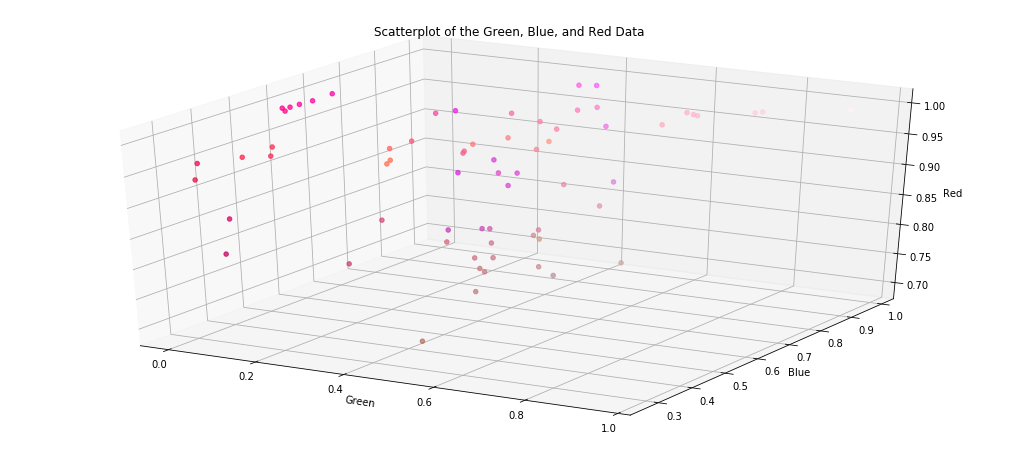

In [30]:

def f(row_series):
    
    return 'pink' in str(row_series.name).lower()

mask_series = xkcd_colors_df.apply(f, axis=1)
show_3d_plot(xkcd_colors_df[mask_series])

In [ ]:

columns_list = ['saeculum_name', 'generation_name', 'xkcd_color']
previous_saeculum_name = ''
print("patriline_df = load_object('patriline_df')")
print("#patriline_df['xkcd_color'] = pd.np.nan")
for patriarch_name, row_series in patriline_df[columns_list].iterrows():
    saeculum_name = row_series['saeculum_name']
    generation_name = row_series['generation_name']
    xkcd_color = row_series['xkcd_color']
    if saeculum_name != previous_saeculum_name:
        previous_saeculum_name = saeculum_name
        print()
        print('# {}'.format(saeculum_name))
    print("mask_series = (patriline_df.index == '{}')".format(patriarch_name))
    print("patriline_df.loc[mask_series, 'xkcd_color'] = '{}'".format(xkcd_color))
print()
print('store_objects(patriline_df=patriline_df)')

[(0.06678190731735843, 'xkcd:very light pink'), (0.21974785452740236, 'xkcd:light pink'), (0.2329623018083003, 'xkcd:pale pink'), (0.3341627512591794, 'xkcd:pastel pink'), (0.34153688423220396, 'xkcd:baby pink'), (0.35376809447353447, 'xkcd:powder pink'), (0.39633072919600437, 'xkcd:soft pink'), (0.5159508752310363, 'xkcd:pinkish grey'), (0.5199887615974216, 'xkcd:faded pink'), (0.5208457322630271, 'xkcd:lavender pink'), (0.5258120173460703, 'xkcd:bubblegum pink'), (0.5524403238528892, 'xkcd:pink'), (0.5531219284598793, 'xkcd:purply pink'), (0.5742788801778954, 'xkcd:pig pink'), (0.5800078218725114, 'xkcd:pinky'), (0.6061329515381981, 'xkcd:peachy pink'), (0.6091447165160031, 'xkcd:carnation pink'), (0.6158860672460115, 'xkcd:rose pink'), (0.617818214692015, 'xkcd:candy pink'), (0.6277572781796911, 'xkcd:violet pink'), (0.6313725490196079, 'xkcd:grey pink'), (0.6324433739865571, 'xkcd:dull pink'), (0.6432089869131405, 'xkcd:dusty pink'), (0.6452023278238358, 'xkcd:pinkish tan'), (0.649

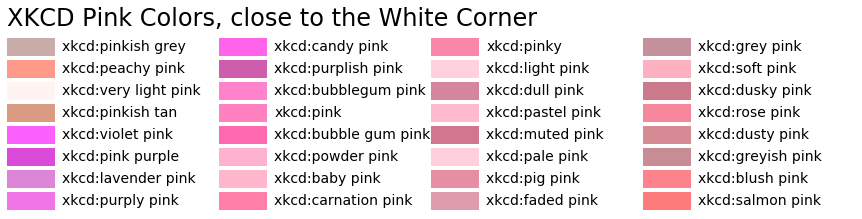

In [48]:

pink_colors_dict = {name: mcolors.to_rgb(color) for name, color in mcolors.XKCD_COLORS.items() if 'pink' in name.lower()}
pink_xkcd_colors_df = colors_dict_to_dataframe(pink_colors_dict)
pink_xkcd_distance_df = get_distance_dataframe(pink_xkcd_colors_df, color_title='XKCD')
show_color_proximity(distance_df=pink_xkcd_distance_df, color_str='White', saeculum_title='Pink')

In [34]:

patriline_df = load_object('patriline_df')
#patriline_df['xkcd_color'] = pd.np.nan

# Millennial
mask_series = (patriline_df.index == 'Stephen Elkanah Babbitt')
patriline_df.loc[mask_series, 'xkcd_color'] = 'xkcd:cyan'
mask_series = (patriline_df.index == 'David George Babbitt')
patriline_df.loc[mask_series, 'xkcd_color'] = 'xkcd:aqua blue'

# Great Power
mask_series = (patriline_df.index == 'Joseph Robert Babbitt, Jr.')
patriline_df.loc[mask_series, 'xkcd_color'] = 'xkcd:bright yellow'
mask_series = (patriline_df.index == 'Joseph Robert Babbitt, Sr.')
patriline_df.loc[mask_series, 'xkcd_color'] = 'xkcd:dandelion'

# Civil War
mask_series = (patriline_df.index == 'David William Babbitt, Jr.')
patriline_df.loc[mask_series, 'xkcd_color'] = 'xkcd:bright magenta'
mask_series = (patriline_df.index == 'David William Babbitt, Sr.')
patriline_df.loc[mask_series, 'xkcd_color'] = 'xkcd:bright purple'

# Revolutionary
mask_series = (patriline_df.index == 'William David Babbitt')
patriline_df.loc[mask_series, 'xkcd_color'] = 'xkcd:primary blue'
mask_series = (patriline_df.index == 'David Babbitt')
patriline_df.loc[mask_series, 'xkcd_color'] = 'xkcd:ultramarine blue'
mask_series = (patriline_df.index == 'Elkanah Babbitt, IV')
patriline_df.loc[mask_series, 'xkcd_color'] = 'xkcd:light royal blue'
mask_series = (patriline_df.index == 'Elkanah Babbitt, III')
patriline_df.loc[mask_series, 'xkcd_color'] = 'xkcd:ultramarine'

# New World
mask_series = (patriline_df.index == 'Elkanah Babbitt, II')
patriline_df.loc[mask_series, 'xkcd_color'] = 'xkcd:bright green'
mask_series = (patriline_df.index == 'Elkanah Babbitt, I')
patriline_df.loc[mask_series, 'xkcd_color'] = 'xkcd:vibrant green'
mask_series = (patriline_df.index == 'Edward Bobet')
patriline_df.loc[mask_series, 'xkcd_color'] = 'xkcd:green'

# Reformation
mask_series = (patriline_df.index == 'Thomas Bobbet')
patriline_df.loc[mask_series, 'xkcd_color'] = 'xkcd:pale pink'
mask_series = (patriline_df.index == '(No Name), Jr.')
patriline_df.loc[mask_series, 'xkcd_color'] = 'xkcd:pink'
mask_series = (patriline_df.index == '(No Name), Sr.')
patriline_df.loc[mask_series, 'xkcd_color'] = 'xkcd:pig pink'

def get_shortest_distance(row_series):
    for column_name in ['xkcd_color', 'css4_color']:
        new_column_name = '{}_text_color'.format(column_name.split('_')[0])
        color = mcolors.to_rgb(row_series[column_name])
        white_distance = distance_from_white(color)
        black_distance = distance_from_black(color)
        if min(white_distance, black_distance) == white_distance:
            row_series[new_column_name] = 'black'
        else:
            row_series[new_column_name] = 'white'
    
    return row_series

patriline_df = patriline_df.apply(get_shortest_distance, axis=1)
store_objects(patriline_df=patriline_df)

Pickling to C:\Users\dev\Documents\repositories\notebooks\Strauss–Howe\saves\pickle\patriline_df.pickle


[(0.0, 'xkcd:white'), (0.0117647058823529, 'xkcd:pale grey'), (0.06678190731735843, 'xkcd:very light pink'), (0.10588235294117643, 'xkcd:off white'), (0.15691175704896124, 'xkcd:ice blue'), (0.16083213062282256, 'xkcd:very pale blue'), (0.16197550139657554, 'xkcd:ice'), (0.16470588235294115, 'xkcd:very light blue'), (0.1686274509803921, 'xkcd:eggshell'), (0.1686274509803921, 'xkcd:really light blue'), (0.18439714424327447, 'xkcd:pale blue'), (0.1847304425617863, 'xkcd:pale mauve'), (0.18580953318403348, 'xkcd:pale'), (0.19572517197596515, 'xkcd:very light purple'), (0.19973069142347988, 'xkcd:pale lavender'), (0.20392156862745103, 'xkcd:ivory'), (0.20788012989331098, 'xkcd:ecru'), (0.20843423162224808, 'xkcd:light light blue'), (0.21974785452740236, 'xkcd:light pink'), (0.2238387951816523, 'xkcd:light sky blue'), (0.22694331445067115, 'xkcd:light lilac'), (0.22977179725945496, 'xkcd:pale lilac'), (0.23167145863124589, 'xkcd:egg shell'), (0.2329623018083003, 'xkcd:pale pink'), (0.233489

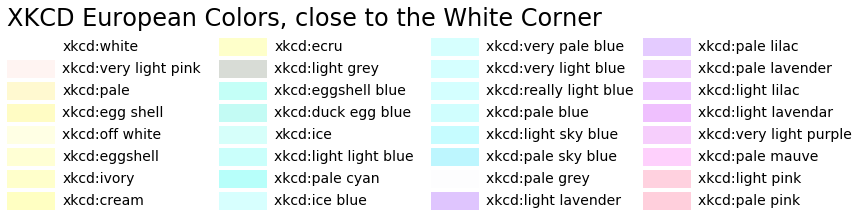

In [31]:

show_color_proximity(color_str='White', saeculum_title='European')

[(0.0, 'xkcd:black'), (0.07714633558002354, 'xkcd:almost black'), (0.11399562238234222, 'xkcd:very dark brown'), (0.17690578146886213, 'xkcd:midnight'), (0.17716638428355322, 'xkcd:dark forest green'), (0.18056257934464842, 'xkcd:dark navy blue'), (0.1823002243006974, 'xkcd:very dark green'), (0.20003844305657803, 'xkcd:very dark blue'), (0.20799106833217443, 'xkcd:midnight blue'), (0.20817583435273723, 'xkcd:dark green'), (0.20843423162224803, 'xkcd:dark navy'), (0.23173783063049658, 'xkcd:dark brown'), (0.2373764070654362, 'xkcd:dark maroon'), (0.25502259588845655, 'xkcd:deep brown'), (0.2565856910267543, 'xkcd:hunter green'), (0.25673548711110444, 'xkcd:navy'), (0.26089486083890034, 'xkcd:dark'), (0.26215913589581596, 'xkcd:very dark purple'), (0.26332975630116934, 'xkcd:chocolate'), (0.2667243305589326, 'xkcd:midnight purple'), (0.27310565249380625, 'xkcd:chocolate brown'), (0.27453781369705316, 'xkcd:racing green'), (0.28008347193206423, 'xkcd:forrest green'), (0.282489073936502, 

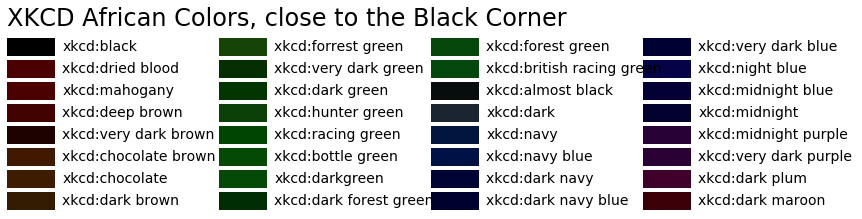

In [32]:

show_color_proximity(color_str='Black', saeculum_title='African')

[(0.008768894029410933, 'xkcd:fire engine red'), (0.050980392156862744, 'xkcd:bright red'), (0.10196078431372546, 'xkcd:red'), (0.1678504671296682, 'xkcd:cherry red'), (0.19159581961264482, 'xkcd:tomato red'), (0.2062088913746652, 'xkcd:vermillion'), (0.21700133854520662, 'xkcd:orangish red'), (0.22910151637613382, 'xkcd:neon red'), (0.23659769614115067, 'xkcd:red orange'), (0.2654528313846345, 'xkcd:orangered'), (0.2731338062645623, 'xkcd:scarlet'), (0.2776293336537703, 'xkcd:cherry'), (0.28008347193206423, 'xkcd:pinkish red'), (0.2808511258006883, 'xkcd:orange red'), (0.2943789688758638, 'xkcd:blood orange'), (0.295473996719523, 'xkcd:orangey red'), (0.2985547656576358, 'xkcd:tomato'), (0.30419342679838324, 'xkcd:reddish orange'), (0.30833606096240446, 'xkcd:lipstick red'), (0.3084357976821284, 'xkcd:strawberry'), (0.3128910471422541, 'xkcd:pink red'), (0.3160210136142083, 'xkcd:pinky red'), (0.3317146395263925, 'xkcd:deep orange'), (0.33891520183235246, 'xkcd:darkish red'), (0.34380

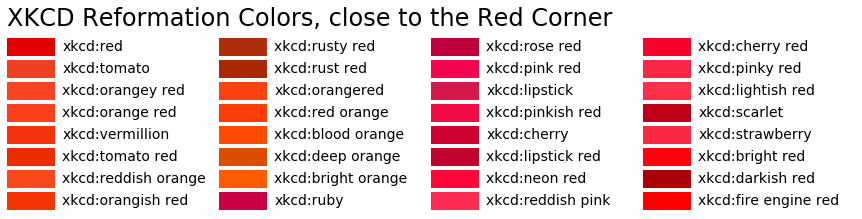

In [33]:

show_color_proximity(color_str='Red', saeculum_title='Reformation')

[(0.0277296776935901, 'xkcd:bright green'), (0.03999230991053165, 'xkcd:fluro green'), (0.04436748430974415, 'xkcd:fluorescent green'), (0.06655122646461624, 'xkcd:neon green'), (0.10910139406465533, 'xkcd:highlighter green'), (0.13958801357300146, 'xkcd:electric green'), (0.1424776637222349, 'xkcd:vibrant green'), (0.20456158989403886, 'xkcd:vivid green'), (0.21198245885081693, 'xkcd:radioactive green'), (0.21657570621935807, 'xkcd:hot green'), (0.2630668208823282, 'xkcd:poison green'), (0.33638739316089944, 'xkcd:green'), (0.37372363845394385, 'xkcd:bright light green'), (0.3756527063475466, 'xkcd:kelly green'), (0.3877596611131959, 'xkcd:shamrock green'), (0.39733831847812834, 'xkcd:bright lime green')]


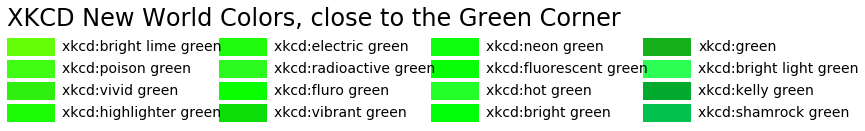

In [38]:

show_color_proximity(color_str='Green', saeculum_title='New World')

[(0.04223658672262357, 'xkcd:primary blue'), (0.06125686020318945, 'xkcd:strong blue'), (0.10874842842244743, 'xkcd:rich blue'), (0.11460109173492128, 'xkcd:pure blue'), (0.17080220972849078, 'xkcd:ultramarine blue'), (0.19830112752581225, 'xkcd:vivid blue'), (0.20850800059699515, 'xkcd:true blue'), (0.22551577007576273, 'xkcd:vibrant blue'), (0.2903285336294839, 'xkcd:light royal blue'), (0.29141239534367525, 'xkcd:blue'), (0.32242831044854064, 'xkcd:electric blue'), (0.3306233554252234, 'xkcd:ultramarine'), (0.3342777854294288, 'xkcd:royal blue'), (0.34751825135522074, 'xkcd:cobalt blue'), (0.35924650950898157, 'xkcd:blue/purple'), (0.3646847980411818, 'xkcd:blue blue')]


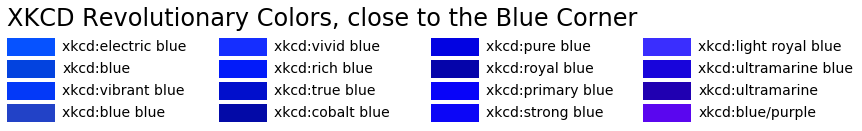

In [39]:

show_color_proximity(color_str='Blue', saeculum_title='Revolutionary')

[(0.09549643656381115, 'xkcd:bright magenta'), (0.1604012653820985, 'xkcd:pink/purple'), (0.1725935771346305, 'xkcd:fuchsia'), (0.20765807521370555, 'xkcd:hot purple'), (0.2159356846735091, 'xkcd:hot magenta'), (0.24981346366483115, 'xkcd:purple/pink'), (0.25529381645113397, 'xkcd:bright purple'), (0.2731338062645623, 'xkcd:neon purple'), (0.30593262533085624, 'xkcd:bright pink'), (0.3149730098345887, 'xkcd:purple pink'), (0.32404593349197797, 'xkcd:bright violet'), (0.3460103804671234, 'xkcd:heliotrope'), (0.34683165269262306, 'xkcd:vibrant purple'), (0.3570566161596875, 'xkcd:pink purple'), (0.36048581001667135, 'xkcd:electric purple'), (0.36080562596898724, 'xkcd:pinkish purple')]


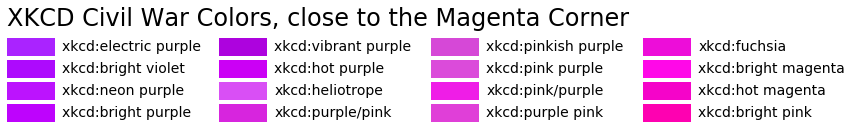

In [40]:

show_color_proximity(color_str='Magenta', saeculum_title='Civil War')

[(0.008768894029410914, 'xkcd:bright yellow'), (0.0784313725490196, 'xkcd:yellow'), (0.09321462214905658, 'xkcd:sunny yellow'), (0.12941176470588234, 'xkcd:dandelion'), (0.1455742054374164, 'xkcd:sunflower yellow'), (0.1830998828224118, 'xkcd:sun yellow'), (0.18888775809870267, 'xkcd:neon yellow'), (0.1963919062831202, 'xkcd:greenish yellow'), (0.21582882989516886, 'xkcd:sunshine yellow'), (0.21661120752378787, 'xkcd:lime yellow'), (0.21974785452740234, 'xkcd:lemon yellow'), (0.2273833570874388, 'xkcd:greeny yellow'), (0.2291015163761338, 'xkcd:piss yellow'), (0.23815257177551333, 'xkcd:sunflower'), (0.23824941457386722, 'xkcd:golden yellow'), (0.24081752341716145, 'xkcd:goldenrod')]


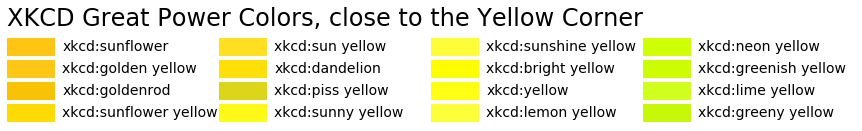

In [41]:

show_color_proximity(color_str='Yellow', saeculum_title='Great Power')

[(0.0, 'xkcd:cyan'), (0.06347613355387705, 'xkcd:bright turquoise'), (0.09589819027950972, 'xkcd:bright aqua'), (0.14984292685915926, 'xkcd:neon blue'), (0.15248801643312612, 'xkcd:bright light blue'), (0.1757720378903135, 'xkcd:aqua blue'), (0.20019214146039555, 'xkcd:bright sky blue'), (0.2247985983994747, 'xkcd:bright teal'), (0.23911923481452782, 'xkcd:aqua'), (0.2550527457491623, 'xkcd:bright cyan'), (0.3102007882441584, 'xkcd:greenish turquoise'), (0.3269045575900773, 'xkcd:greenish cyan'), (0.3343467869340196, 'xkcd:aqua marine'), (0.3388471306231835, 'xkcd:aquamarine'), (0.34956995604810276, 'xkcd:bright sea green'), (0.3842536967924373, 'xkcd:turquoise blue')]


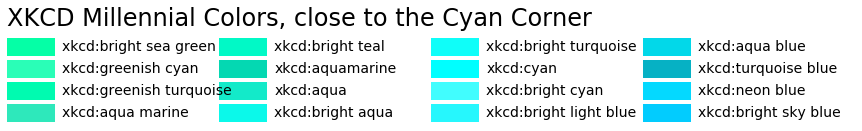

In [42]:

show_color_proximity(color_str='Cyan', saeculum_title='Millennial')

In [21]:

np.unique(list(xkcd_face_dictionary.values()))

array(['black', 'black-blue-cyan-green', 'black-red-magenta-blue',
       'black-red-yellow-green', 'cyan', 'white',
       'white-cyan-blue-magenta', 'white-cyan-green-yellow',
       'white-yellow-red-magenta'], dtype='<U24')

In [23]:

for saeculum_name in generations_df[mask_series]['saeculum_name'].unique():
    saeculum_name = '_'.join(saeculum_name.lower().split(' '))
    print('xkcd_{}_list = []'.format(saeculum_name))

xkcd_reformation_list = []
xkcd_new_world_list = []
xkcd_revolutionary_list = []
xkcd_civil_war_list = []
xkcd_great_power_list = []
xkcd_millennial_list = []


In [24]:

xkcd_reformation_list = []
xkcd_new_world_list = []
xkcd_revolutionary_list = []
xkcd_civil_war_list = []
xkcd_great_power_list = []
xkcd_millennial_list = []
for key, value in xkcd_face_dictionary.items():
    if value == 'black-blue-cyan-green':
        xkcd_reformation_list.append(key)
    elif value == 'black-red-magenta-blue':
        xkcd_new_world_list.append(key)
    elif value == 'black-red-yellow-green':
        xkcd_revolutionary_list.append(key)
    elif value == 'white-cyan-blue-magenta':
        xkcd_civil_war_list.append(key)
    elif value == 'white-cyan-green-yellow':
        xkcd_great_power_list.append(key)
    elif value == 'white-yellow-red-magenta':
        xkcd_millennial_list.append(key)

In [143]:

xkcd_kbcg_reformation_dict = {name: distance_from_kbcg_face(mcolors.to_rgb(color)) for name,
                              color in mcolors.XKCD_COLORS.items() if name in xkcd_reformation_list}
color_tuple_list = sorted((distance, name) for name, distance in xkcd_kbcg_reformation_dict.items())

[(0.38318160579797494, 'xkcd:light forest green'), (0.405526982819509, 'xkcd:darkish green'), (0.4119420719775158, 'xkcd:pine'), (0.43358612092628157, 'xkcd:medium green')]


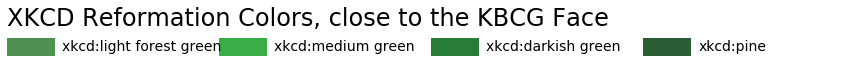

In [144]:

test_list = color_tuple_list[:4]
saeculum_title = 'Reformation'
face_title = 'KBCG'
nearness_str = 'close to'
display_test_colors(test_list, saeculum_title, face_title, nearness_str)

[(1.1106315766440422, 'xkcd:bright blue'), (1.1227917367533, 'xkcd:vibrant blue'), (1.1251997985679807, 'xkcd:pure blue'), (1.1623432827520714, 'xkcd:rich blue')]


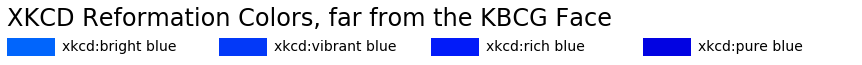

In [145]:

test_list = color_tuple_list[-4:]
saeculum_title = 'Reformation'
face_title = 'KBCG'
nearness_str = 'far from'
display_test_colors(test_list, saeculum_title, face_title, nearness_str)

In [146]:

xkcd_krmb_new_world_dict = {name: distance_from_krmb_face(mcolors.to_rgb(color)) for name,
                            color in mcolors.XKCD_COLORS.items() if name in xkcd_new_world_list}
color_tuple_list = sorted((distance, name) for name, distance in xkcd_krmb_new_world_dict.items())

[(0.378436452267035, 'xkcd:blueberry'), (0.4872302435864204, 'xkcd:purplish grey'), (0.4948407407522032, 'xkcd:deep blue'), (0.5041389627970377, 'xkcd:indigo blue')]


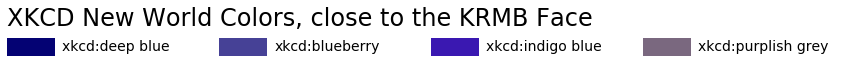

In [147]:

test_list = color_tuple_list[:4]
saeculum_title = 'New World'
face_title = 'KRMB'
nearness_str = 'close to'
display_test_colors(test_list, saeculum_title, face_title, nearness_str)

[(1.1370486628410363, 'xkcd:cherry red'), (1.143011125453475, 'xkcd:red'), (1.2048313609080754, 'xkcd:bright red'), (1.2183557029836136, 'xkcd:fire engine red')]


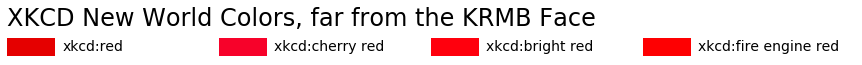

In [148]:

test_list = color_tuple_list[-4:]
saeculum_title = 'New World'
face_title = 'KRMB'
nearness_str = 'far from'
display_test_colors(test_list, saeculum_title, face_title, nearness_str)

In [149]:

xkcd_kryg_revolutionary_dict = {name: distance_from_kryg_face(mcolors.to_rgb(color)) for name,
                                color in mcolors.XKCD_COLORS.items() if name in xkcd_revolutionary_list}
color_tuple_list = sorted((distance, name) for name, distance in xkcd_kryg_revolutionary_dict.items())

[(0.4367314196950636, 'xkcd:brownish red'), (0.43894424385318187, 'xkcd:brick'), (0.44477400315135013, 'xkcd:cocoa'), (0.4516874253072579, 'xkcd:dark taupe')]


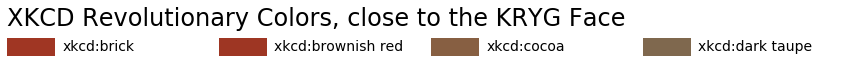

In [150]:

test_list = color_tuple_list[:4]
saeculum_title = 'Revolutionary'
face_title = 'KRYG'
nearness_str = 'close to'
display_test_colors(test_list, saeculum_title, face_title, nearness_str)

[(1.0058460414651456, 'xkcd:golden'), (1.081340105818763, 'xkcd:vivid green'), (1.0876787129933922, 'xkcd:vibrant green'), (1.104494331265218, 'xkcd:lemon green')]


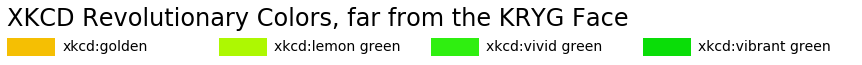

In [151]:

test_list = color_tuple_list[-4:]
saeculum_title = 'Revolutionary'
face_title = 'KRYG'
nearness_str = 'far from'
display_test_colors(test_list, saeculum_title, face_title, nearness_str)

In [152]:

xkcd_wcbm_civil_war_dict = {name: distance_from_wcbm_face(mcolors.to_rgb(color)) for name,
                            color in mcolors.XKCD_COLORS.items() if name in xkcd_civil_war_list}
color_tuple_list = sorted((distance, name) for name, distance in xkcd_wcbm_civil_war_dict.items())

[(0.4000864958383989, 'xkcd:cool grey'), (0.41212869066606717, 'xkcd:bluegrey'), (0.41994672040813175, 'xkcd:bluey grey'), (0.42545856934957527, 'xkcd:greyblue')]


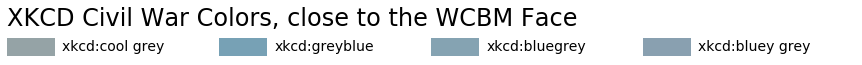

In [153]:

test_list = color_tuple_list[:4]
saeculum_title = 'Civil War'
face_title = 'WCBM'
nearness_str = 'close to'
display_test_colors(test_list, saeculum_title, face_title, nearness_str)

[(1.0469890554709957, 'xkcd:vivid blue'), (1.0765295172984175, 'xkcd:neon purple'), (1.0941492721552144, 'xkcd:bright violet'), (1.1308847964820572, 'xkcd:bright purple')]


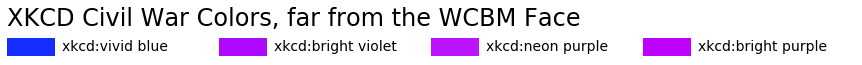

In [154]:

test_list = color_tuple_list[-4:]
saeculum_title = 'Civil War'
face_title = 'WCBM'
nearness_str = 'far from'
display_test_colors(test_list, saeculum_title, face_title, nearness_str)

In [155]:

xkcd_wcgy_great_power_dict = {name: distance_from_wcgy_face(mcolors.to_rgb(color)) for name,
                              color in mcolors.XKCD_COLORS.items() if name in xkcd_great_power_list}
color_tuple_list = sorted((distance, name) for name, distance in xkcd_wcgy_great_power_dict.items())

[(0.3842436910977257, 'xkcd:greenish beige'), (0.39643742224692335, 'xkcd:greenish tan'), (0.4066819820513108, 'xkcd:pale olive'), (0.4192136686244298, 'xkcd:light olive')]


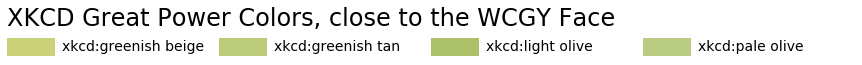

In [156]:

test_list = color_tuple_list[:4]
saeculum_title = 'Great Power'
face_title = 'WCGY'
nearness_str = 'close to'
display_test_colors(test_list, saeculum_title, face_title, nearness_str)

[(1.1675840848331691, 'xkcd:neon green'), (1.1865288983438844, 'xkcd:fluorescent green'), (1.1896742726679679, 'xkcd:fluro green'), (1.2105679730514647, 'xkcd:bright green')]


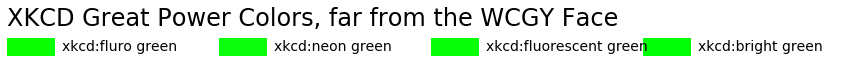

In [157]:

test_list = color_tuple_list[-4:]
saeculum_title = 'Great Power'
face_title = 'WCGY'
nearness_str = 'far from'
display_test_colors(test_list, saeculum_title, face_title, nearness_str)

In [158]:

xkcd_wyrm_millennial_dict = {name: distance_from_wyrm_face(mcolors.to_rgb(color)) for name,
                             color in mcolors.XKCD_COLORS.items() if name in xkcd_millennial_list}
color_tuple_list = sorted((distance, name) for name, distance in xkcd_wyrm_millennial_dict.items())

[(0.36886725616683463, 'xkcd:orchid'), (0.38406354401831244, 'xkcd:dusty lavender'), (0.39939400462983426, 'xkcd:lavender pink'), (0.42728005217125203, 'xkcd:purpley grey')]


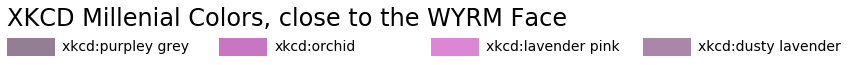

In [159]:

test_list = color_tuple_list[:4]
saeculum_title = 'Millenial'
face_title = 'WYRM'
nearness_str = 'close to'
display_test_colors(test_list, saeculum_title, face_title, nearness_str)

[(1.1509085724327508, 'xkcd:dandelion'), (1.161588883857746, 'xkcd:yellow'), (1.1629980216270117, 'xkcd:sunflower yellow'), (1.2183557029836136, 'xkcd:bright yellow')]


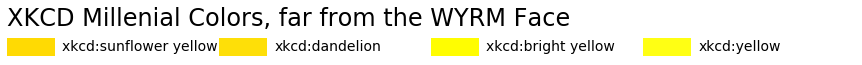

In [160]:

test_list = color_tuple_list[-4:]
saeculum_title = 'Millenial'
face_title = 'WYRM'
nearness_str = 'far from'
display_test_colors(test_list, saeculum_title, face_title, nearness_str)

[(0.36886725616683463, 'xkcd:orchid'), (0.4384008548079571, 'xkcd:pink purple'), (0.4737719104642489, 'xkcd:purpleish pink'), (0.47997981503118464, 'xkcd:pale magenta')]


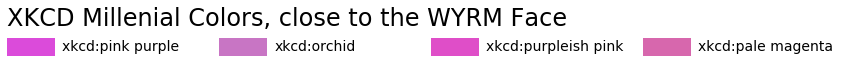

In [164]:

test_list = color_tuple_list[:20:5]
saeculum_title = 'Millenial'
face_title = 'WYRM'
nearness_str = 'close to'
display_test_colors(test_list, saeculum_title, face_title, nearness_str)

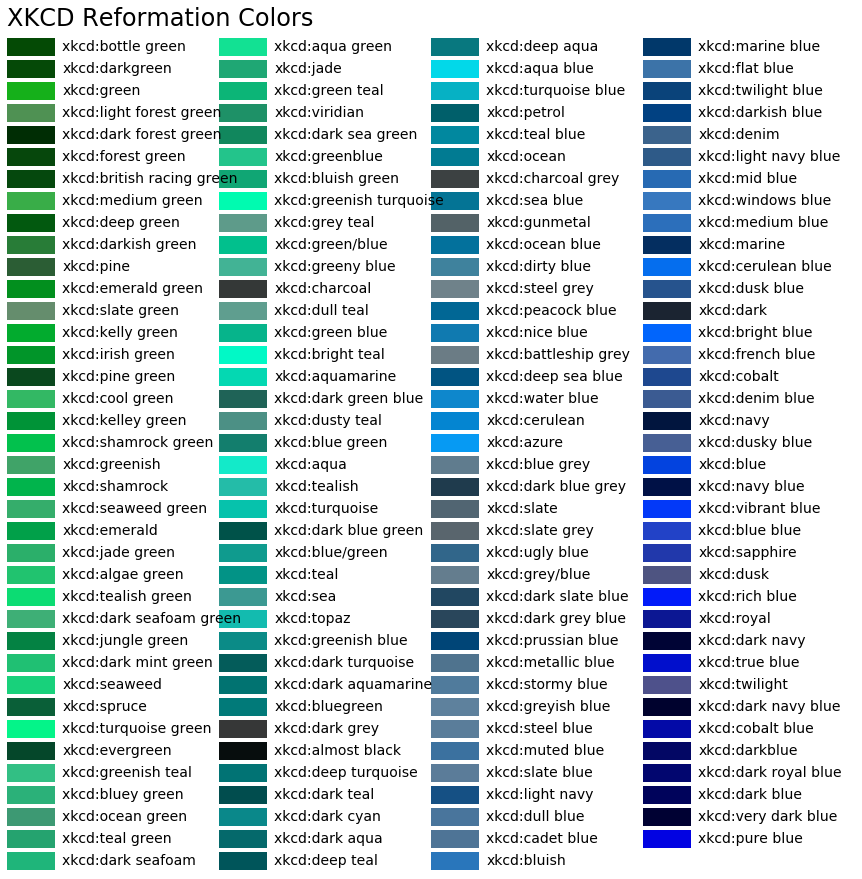

In [38]:

plot_colortable(colors_dict={name: color for name, color in mcolors.XKCD_COLORS.items() if name in xkcd_reformation_list},
                title='XKCD Reformation Colors', sort_colors=True, emptycols=0)

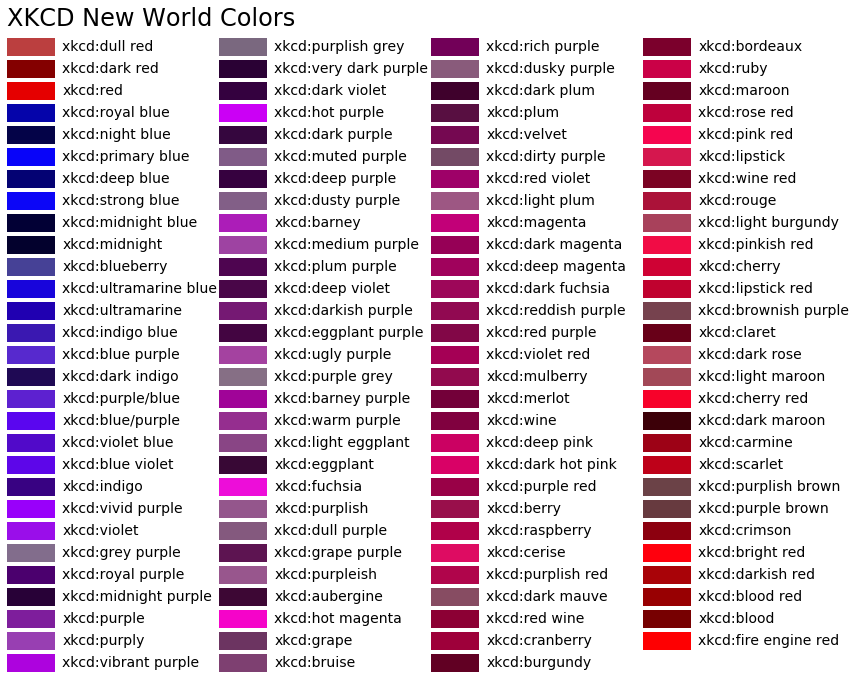

In [39]:

plot_colortable(colors_dict={name: color for name, color in mcolors.XKCD_COLORS.items() if name in xkcd_new_world_list},
                title='XKCD New World Colors', sort_colors=True, emptycols=0)

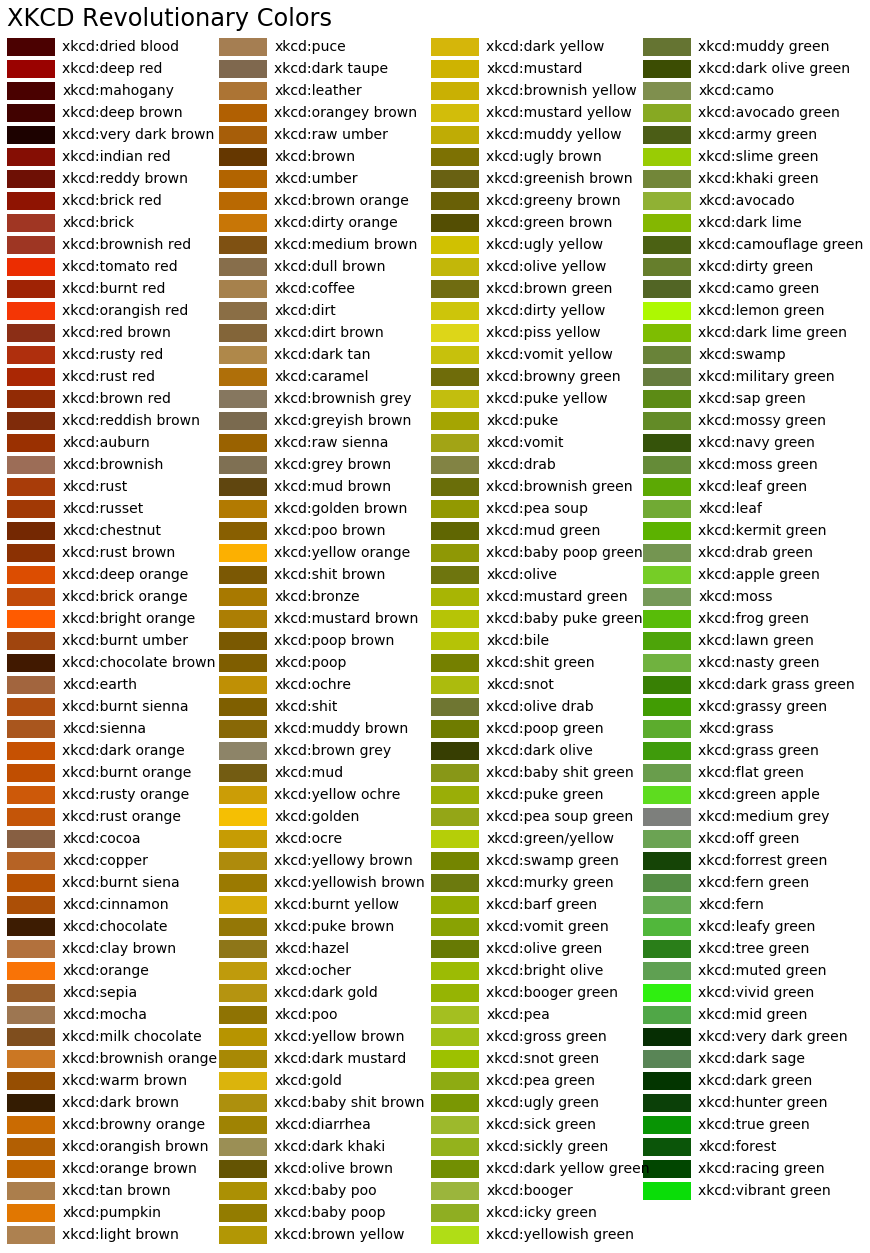

In [40]:

plot_colortable(colors_dict={name: color for name, color in mcolors.XKCD_COLORS.items() if name in xkcd_revolutionary_list},
                title='XKCD Revolutionary Colors', sort_colors=True, emptycols=0)

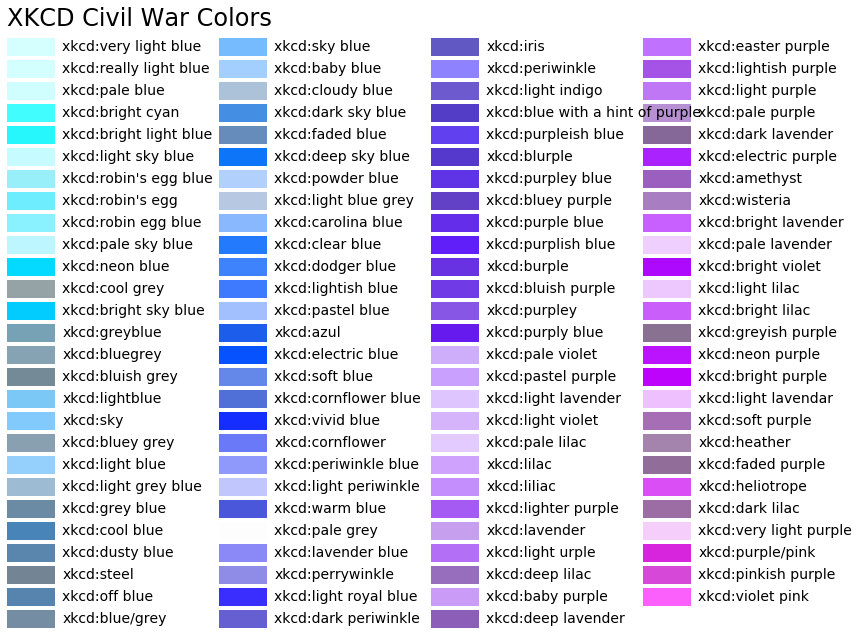

In [41]:

plot_colortable(colors_dict={name: color for name, color in mcolors.XKCD_COLORS.items() if name in xkcd_civil_war_list},
                title='XKCD Civil War Colors', sort_colors=True, emptycols=0)

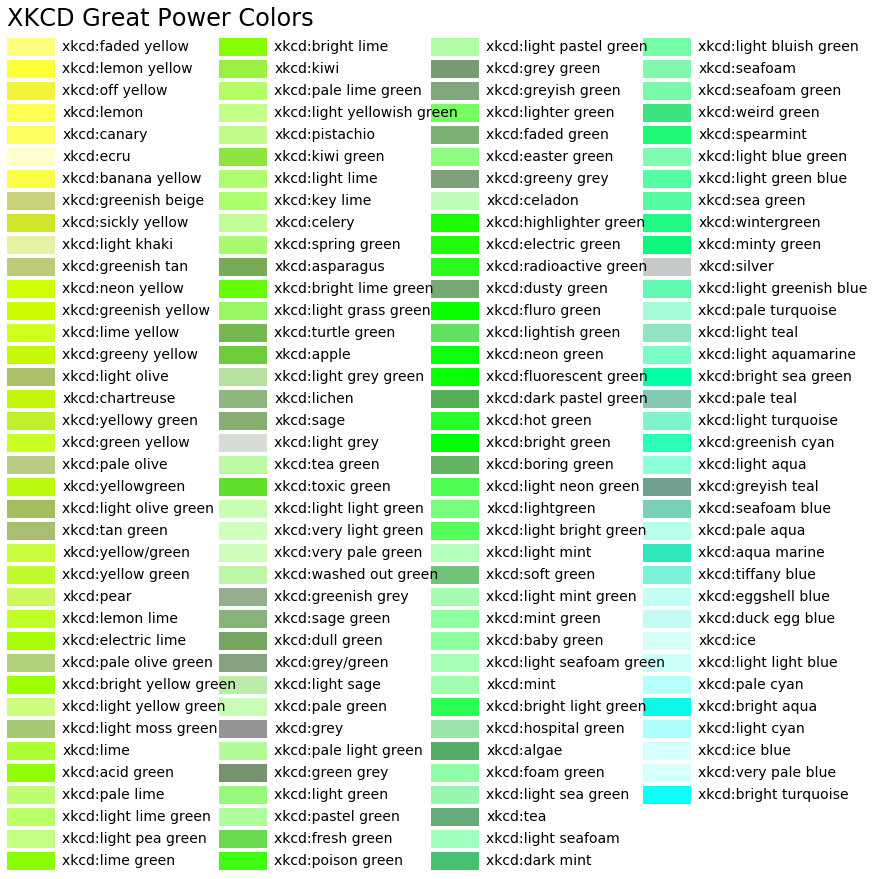

In [42]:

plot_colortable(colors_dict={name: color for name, color in mcolors.XKCD_COLORS.items() if name in xkcd_great_power_list},
                title='XKCD Great Power Colors', sort_colors=True, emptycols=0)

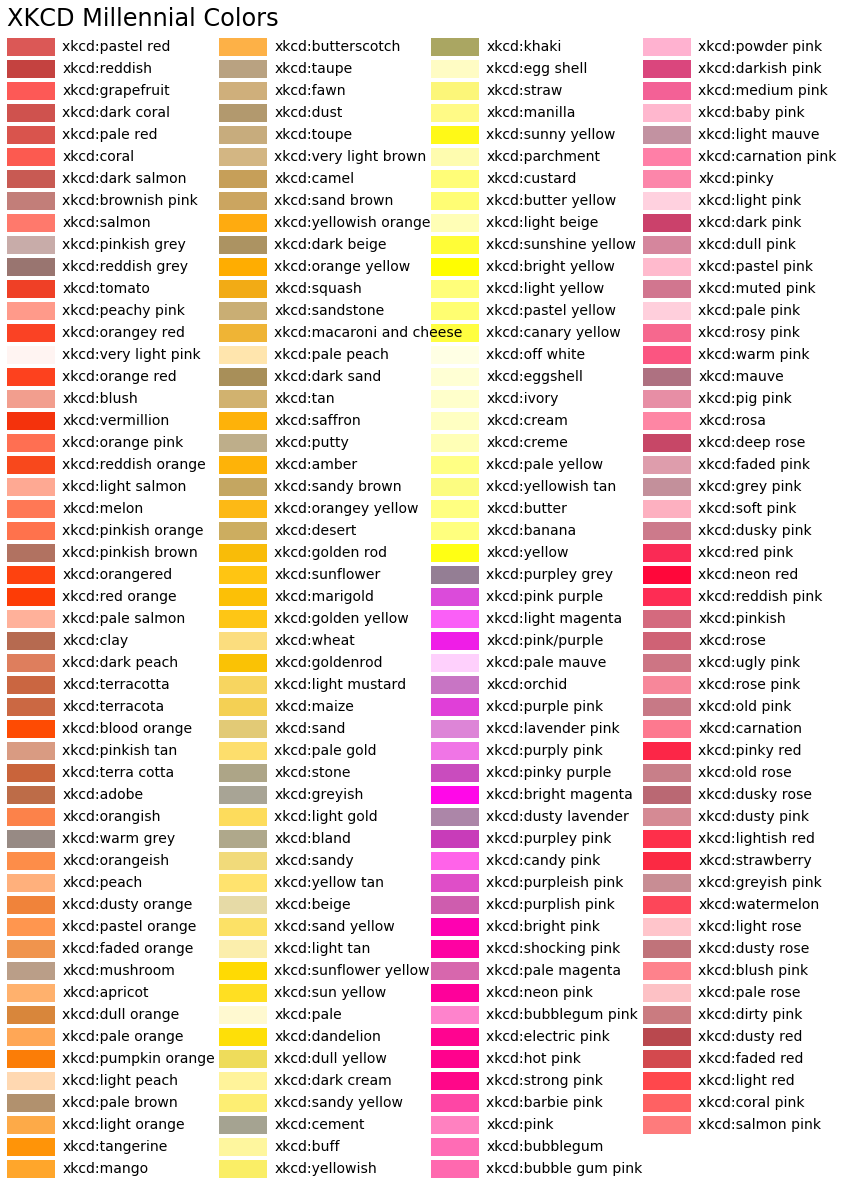

In [43]:

plot_colortable(colors_dict={name: color for name, color in mcolors.XKCD_COLORS.items() if name in xkcd_millennial_list},
                title='XKCD Millennial Colors', sort_colors=True, emptycols=0)


# CSS4

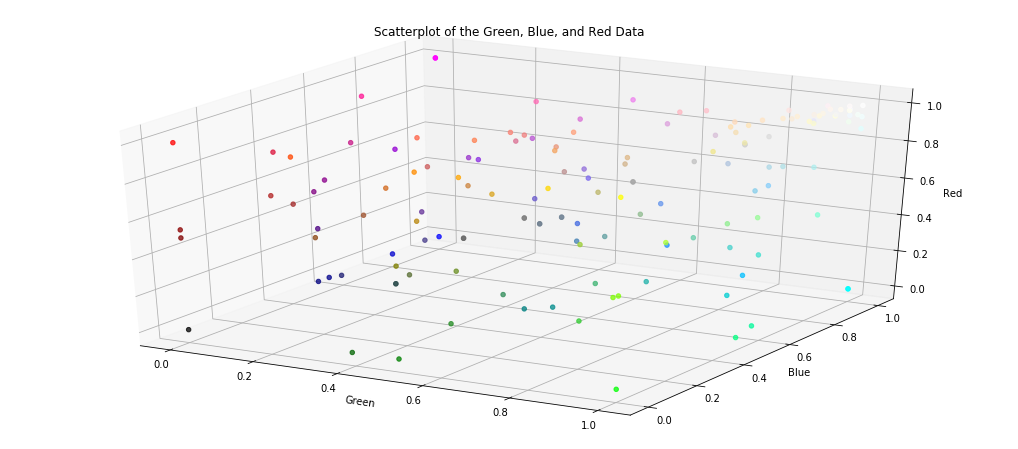

In [51]:

colors_dict = {name: mcolors.to_rgb(color) for name, color in mcolors.CSS4_COLORS.items()}
css4_colors_df = colors_dict_to_dataframe(colors_dict)
show_3d_plot(css4_colors_df)

In [63]:

css4_reformation_list = []
css4_new_world_list = []
css4_revolutionary_list = []
css4_civil_war_list = []
css4_great_power_list = []
css4_millennial_list = []
css4_distance_df = get_distance_dataframe(css4_colors_df, color_title='CSS4')
css4_face_dictionary = get_face_dictionary(css4_distance_df)
for key, value in css4_face_dictionary.items():
    if value == 'black-blue-cyan-green':
        css4_reformation_list .append(key)
    elif value == 'black-red-magenta-blue':
        css4_new_world_list .append(key)
    elif value == 'black-red-yellow-green':
        css4_revolutionary_list .append(key)
    elif value == 'white-cyan-blue-magenta':
        css4_civil_war_list .append(key)
    elif value == 'white-cyan-green-yellow':
        css4_great_power_list .append(key)
    elif value == 'white-yellow-red-magenta':
        css4_millennial_list .append(key)

In [235]:

generations_df = load_object('generations_df')
mask_series = (generations_df['birth_year_begin'] >= min_year)
generations_df[mask_series]['saeculum_name'].unique()

array(['Reformation', 'New World', 'Revolutionary', 'Civil War',
       'Great Power', 'Millennial'], dtype=object)

[(0.0, 'white'), (0.02772967769359016, 'snow'), (0.03882154877102616, 'ghostwhite'), (0.0438444701470547, 'mintcream'), (0.05882352941176472, 'azure'), (0.05882352941176472, 'ivory'), (0.06200544431702707, 'floralwhite'), (0.06491351120488963, 'aliceblue'), (0.0679235610811324, 'whitesmoke'), (0.07069708383262724, 'lavenderblush'), (0.07734542322869024, 'seashell'), (0.08318903308077032, 'honeydew'), (0.10588235294117646, 'oldlace'), (0.11600156437450228, 'linen'), (0.1215686274509804, 'lightcyan'), (0.1215686274509804, 'lightyellow')]


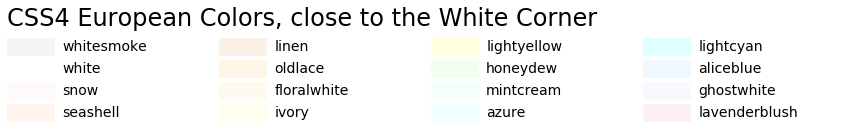

In [240]:

show_color_proximity(distance_df=css4_distance_df, color_dict=mcolors.CSS4_COLORS, color_str='White', color_title='CSS4', saeculum_title='European')

[(0.0, 'black'), (0.39215686274509803, 'darkgreen'), (0.4605798461660566, 'midnightblue'), (0.47531935479493775, 'darkslategray'), (0.47531935479493775, 'darkslategrey'), (0.5019607843137255, 'green'), (0.5019607843137255, 'maroon'), (0.5019607843137255, 'navy'), (0.5450980392156862, 'darkblue'), (0.5450980392156862, 'darkred'), (0.5667039814025358, 'darkolivegreen'), (0.5767906274484194, 'forestgreen'), (0.588562000776613, 'indigo'), (0.6131081277530099, 'saddlebrown'), (0.6588468716686556, 'darkslateblue'), (0.6678881543323133, 'seagreen')]


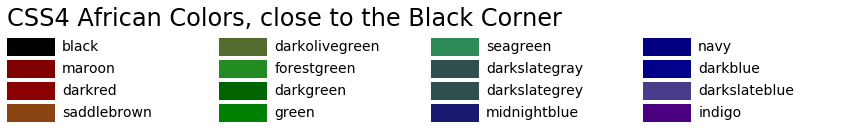

In [241]:

show_color_proximity(distance_df=css4_distance_df, color_dict=mcolors.CSS4_COLORS, color_str='Black', color_title='CSS4', saeculum_title='African')

[(0.0, 'red'), (0.27058823529411763, 'orangered'), (0.283467299898058, 'crimson'), (0.3559998185658468, 'firebrick'), (0.4228753118967395, 'brown'), (0.4549019607843138, 'darkred'), (0.46317693376540064, 'chocolate'), (0.4777558715684684, 'tomato'), (0.4980392156862745, 'maroon'), (0.5228202584862061, 'sienna'), (0.5345142635004502, 'saddlebrown'), (0.5466053359694408, 'indianred'), (0.5490196078431373, 'darkorange'), (0.5718771238901867, 'mediumvioletred'), (0.5817815907196352, 'deeppink'), (0.588614257014022, 'coral')]


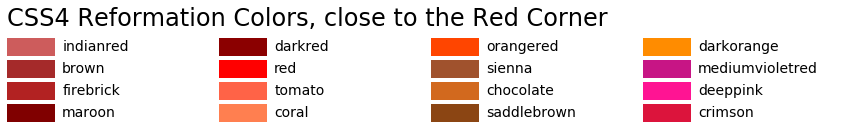

In [242]:

show_color_proximity(distance_df=css4_distance_df, color_dict=mcolors.CSS4_COLORS, color_str='Red', color_title='CSS4', saeculum_title='Reformation')

[(0.0, 'lime'), (0.33961780540566217, 'limegreen'), (0.48641680397529696, 'lawngreen'), (0.4924341067401494, 'forestgreen'), (0.4980392156862745, 'chartreuse'), (0.4980392156862745, 'green'), (0.4980392156862745, 'springgreen'), (0.583576321116821, 'mediumseagreen'), (0.5965555366150342, 'seagreen'), (0.6042397939278215, 'mediumspringgreen'), (0.607843137254902, 'darkgreen'), (0.6255240017909857, 'olivedrab'), (0.6645410172084788, 'yellowgreen'), (0.6942173407967966, 'darkolivegreen'), (0.7030225292711622, 'greenyellow'), (0.707112218357348, 'olive')]


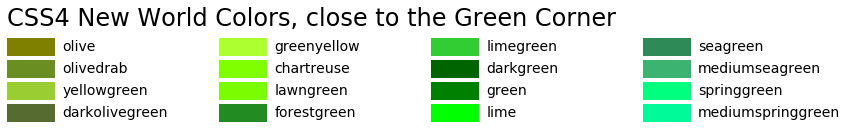

In [243]:

show_color_proximity(distance_df=css4_distance_df, color_dict=mcolors.CSS4_COLORS, color_str='Green', color_title='CSS4', saeculum_title='New World')

[(0.0, 'blue'), (0.196078431372549, 'mediumblue'), (0.4549019607843138, 'darkblue'), (0.4980392156862745, 'navy'), (0.49836333439760133, 'royalblue'), (0.5716619504750295, 'indigo'), (0.5768306198650006, 'dodgerblue'), (0.5776698210442786, 'midnightblue'), (0.578135517558662, 'blueviolet'), (0.579490555672655, 'slateblue'), (0.5864154857063391, 'darkslateblue'), (0.6000000000000001, 'rebeccapurple'), (0.605498323627256, 'darkviolet'), (0.6351730700462331, 'mediumslateblue'), (0.6494311828109488, 'steelblue'), (0.662153117677112, 'darkorchid')]


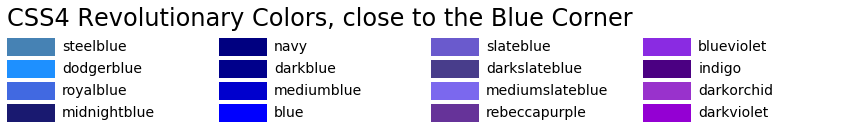

In [244]:

show_color_proximity(distance_df=css4_distance_df, color_dict=mcolors.CSS4_COLORS, color_str='Blue',
                     color_title='CSS4', saeculum_title='Revolutionary')

[(0.0, 'fuchsia'), (0.0, 'magenta'), (0.430730359772423, 'deeppink'), (0.4537002382520059, 'darkviolet'), (0.4627118632133001, 'mediumorchid'), (0.48831009742736164, 'darkorchid'), (0.48970956248985203, 'orchid'), (0.5018841853319862, 'blueviolet'), (0.5060191333554486, 'hotpink'), (0.518448577330134, 'violet'), (0.5328284807768361, 'mediumvioletred'), (0.6262734047898708, 'mediumpurple'), (0.6262734047898708, 'palevioletred'), (0.6433285224912904, 'darkmagenta'), (0.6551719532692424, 'plum'), (0.6623737212171205, 'mediumslateblue')]


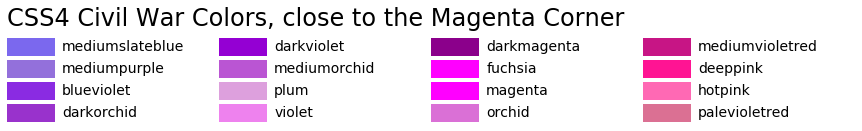

In [245]:

show_color_proximity(distance_df=css4_distance_df, color_dict=mcolors.CSS4_COLORS, color_str='Magenta',
                     color_title='CSS4', saeculum_title='Civil War')

[(0.0, 'yellow'), (0.1568627450980392, 'gold'), (0.3529411764705882, 'orange'), (0.37064529076299185, 'greenyellow'), (0.40170723710742734, 'goldenrod'), (0.4509803921568627, 'darkorange'), (0.4834993550125769, 'yellowgreen'), (0.5019607843137255, 'chartreuse'), (0.5138601829113628, 'lawngreen'), (0.5205208405103615, 'sandybrown'), (0.5518554212814196, 'darkgoldenrod'), (0.5607980253362782, 'khaki'), (0.568140426998876, 'darkkhaki'), (0.5730457152552448, 'peru'), (0.5919360710310025, 'coral'), (0.6063739359915661, 'lightsalmon')]


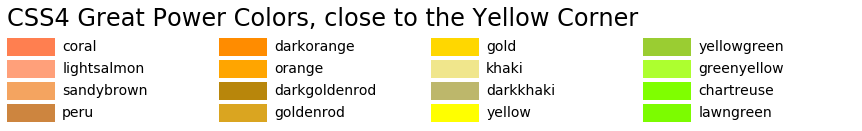

In [249]:

show_color_proximity(distance_df=css4_distance_df, color_dict=mcolors.CSS4_COLORS, color_str='Yellow',
                     color_title='CSS4', saeculum_title='Great Power')

[(0.0, 'aqua'), (0.0, 'cyan'), (0.25098039215686274, 'deepskyblue'), (0.26356325646347534, 'darkturquoise'), (0.33427778542942876, 'turquoise'), (0.3902108579327293, 'mediumturquoise'), (0.39656347702610517, 'mediumspringgreen'), (0.45091218580557174, 'dodgerblue'), (0.466946694694667, 'lightseagreen'), (0.5019607843137255, 'springgreen'), (0.5258120173460702, 'aquamarine'), (0.5563792432870142, 'mediumaquamarine'), (0.5635472864112915, 'lightskyblue'), (0.5686409734700429, 'skyblue'), (0.575816622524789, 'cornflowerblue'), (0.6341553579920091, 'steelblue')]


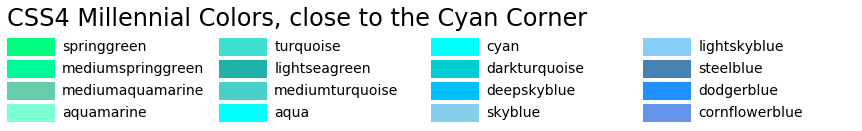

In [247]:

show_color_proximity(distance_df=css4_distance_df, color_dict=mcolors.CSS4_COLORS, color_str='Cyan', color_title='CSS4', saeculum_title='Millennial')

In [248]:

css4_kbcg_reformation_dict = {name: distance_from_kbcg_face(mcolors.to_rgb(color)) for name,
                              color in mcolors.CSS4_COLORS.items() if name in css4_reformation_list}

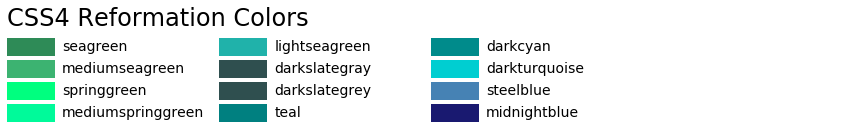

In [64]:

plot_colortable(colors_dict={name: color for name, color in mcolors.CSS4_COLORS.items() if name in css4_reformation_list},
                title='CSS4 Reformation Colors', sort_colors=True, emptycols=1)

[(0.4696641253268049, 'seagreen'), (0.48146738413297774, 'darkslategray'), (0.48146738413297774, 'darkslategrey'), (0.5542815072099282, 'mediumseagreen'), (0.7084973349730931, 'teal'), (0.7183699348676831, 'midnightblue'), (0.7410571540022304, 'darkcyan'), (0.7410882819201671, 'steelblue')]


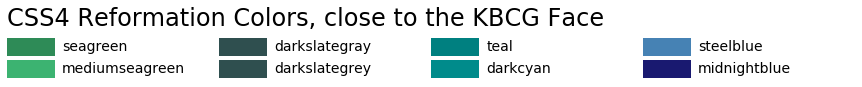

In [197]:

color_tuple_list = sorted((distance, name) for name, distance in css4_kbcg_reformation_dict.items())
test_list = color_tuple_list[:8]
saeculum_title = 'Reformation'
face_title = 'KBCG'
nearness_str = 'close to'
display_test_colors(test_list, saeculum_title, face_title, nearness_str, color_dict=mcolors.CSS4_COLORS, color_title='CSS4')

In [198]:

reformation_color_list = ['mediumseagreen', 'seagreen', 'darkcyan', 'steelblue']

[(0.7898870606785827, 'lightseagreen'), (0.8648948261848949, 'springgreen'), (0.9195095896338881, 'mediumspringgreen'), (1.008228353939247, 'darkturquoise')]


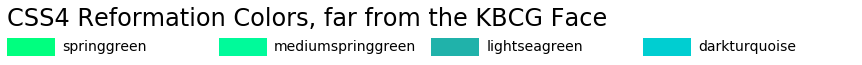

In [169]:

color_tuple_list = sorted((distance, name) for name, distance in css4_kbcg_reformation_dict.items())
test_list = color_tuple_list[-4:]
saeculum_title = 'Reformation'
face_title = 'KBCG'
nearness_str = 'far from'
display_test_colors(test_list, saeculum_title, face_title, nearness_str, color_dict=mcolors.CSS4_COLORS, color_title='CSS4')

In [170]:

css4_krmb_new_world_dict = {name: distance_from_krmb_face(mcolors.to_rgb(color)) for name,
                            color in mcolors.CSS4_COLORS.items() if name in css4_new_world_list}

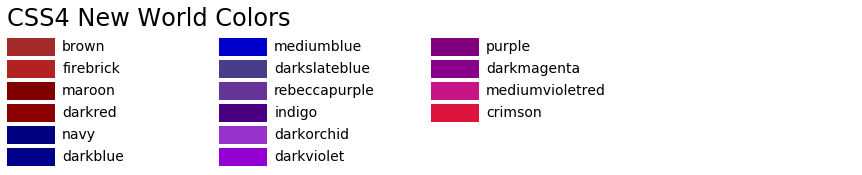

In [67]:

plot_colortable(colors_dict={name: color for name, color in mcolors.CSS4_COLORS.items() if name in css4_new_world_list},
                title='CSS4 New World Colors', sort_colors=True, emptycols=1)

[(0.3869954454736876, 'darkslateblue'), (0.5000038446603435, 'navy'), (0.5020297134045948, 'darkblue'), (0.5099019513592785, 'rebeccapurple'), (0.5801735147260192, 'indigo'), (0.5851224827990892, 'mediumblue'), (0.7084973349730931, 'purple'), (0.736456597415605, 'darkorchid'), (0.7410571540022304, 'darkmagenta'), (0.8022028495117092, 'brown'), (0.8331141580285226, 'darkviolet'), (0.8671589410188022, 'maroon')]


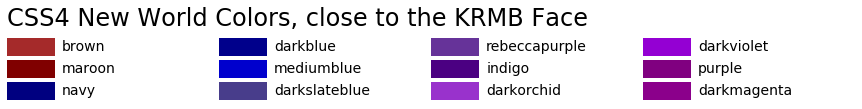

In [195]:

color_tuple_list = sorted((distance, name) for name, distance in css4_krmb_new_world_dict.items())
test_list = color_tuple_list[:12]
saeculum_title = 'New World'
face_title = 'KRMB'
nearness_str = 'close to'
display_test_colors(test_list, saeculum_title, face_title, nearness_str, color_dict=mcolors.CSS4_COLORS, color_title='CSS4')

In [199]:

new_world_color_list = ['brown', 'mediumblue', 'rebeccapurple', 'darkmagenta']

[(0.8695674991194174, 'firebrick'), (0.8853847694234136, 'mediumvioletred'), (0.8928224192731642, 'darkred'), (0.9960514123246093, 'crimson')]


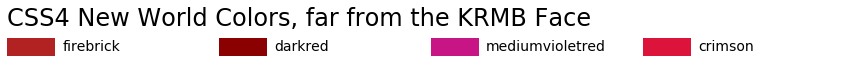

In [172]:

color_tuple_list = sorted((distance, name) for name, distance in css4_krmb_new_world_dict.items())
test_list = color_tuple_list[-4:]
saeculum_title = 'New World'
face_title = 'KRMB'
nearness_str = 'far from'
display_test_colors(test_list, saeculum_title, face_title, nearness_str, color_dict=mcolors.CSS4_COLORS, color_title='CSS4')

In [173]:

css4_kryg_revolutionary_dict = {name: distance_from_kryg_face(mcolors.to_rgb(color)) for name,
                                color in mcolors.CSS4_COLORS.items() if name in css4_revolutionary_list}

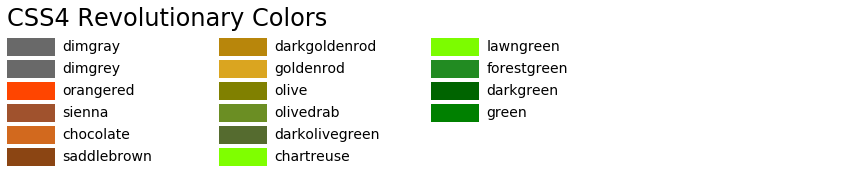

In [68]:

plot_colortable(colors_dict={name: color for name, color in mcolors.CSS4_COLORS.items() if name in css4_revolutionary_list},
                title='CSS4 Revolutionary Colors', sort_colors=True, emptycols=1)

[(0.4302570246566998, 'dimgray'), (0.4302570246566998, 'dimgrey'), (0.47362581732887615, 'sienna'), (0.5062546129958189, 'saddlebrown'), (0.5509140983074913, 'darkolivegreen'), (0.6483943436779, 'chocolate'), (0.6694348526291772, 'olivedrab'), (0.7084973349730931, 'olive'), (0.7307230465118612, 'darkgoldenrod'), (0.7523435127956343, 'forestgreen'), (0.7571116120358905, 'orangered'), (0.8085709647260886, 'darkgreen')]


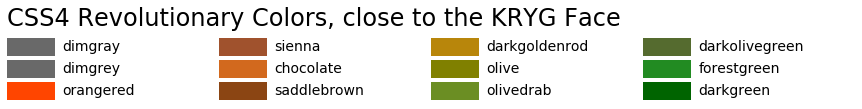

In [194]:

color_tuple_list = sorted((distance, name) for name, distance in css4_kryg_revolutionary_dict.items())
test_list = color_tuple_list[:12]
saeculum_title = 'Revolutionary'
face_title = 'KRYG'
nearness_str = 'close to'
display_test_colors(test_list, saeculum_title, face_title, nearness_str, color_dict=mcolors.CSS4_COLORS, color_title='CSS4')

In [ ]:

revolutionary_color_list = ['']

[(0.827585715264098, 'goldenrod'), (0.8671589410188022, 'green'), (1.1076088594900797, 'lawngreen'), (1.1180357081395589, 'chartreuse')]


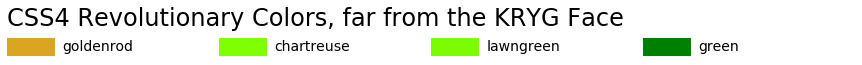

In [175]:

color_tuple_list = sorted((distance, name) for name, distance in css4_kryg_revolutionary_dict.items())
test_list = color_tuple_list[-4:]
saeculum_title = 'Revolutionary'
face_title = 'KRYG'
nearness_str = 'far from'
display_test_colors(test_list, saeculum_title, face_title, nearness_str, color_dict=mcolors.CSS4_COLORS, color_title='CSS4')

In [190]:

css4_wcbm_civil_war_dict = {name: distance_from_wcbm_face(mcolors.to_rgb(color)) for name,
                            color in mcolors.CSS4_COLORS.items() if name in css4_civil_war_list}

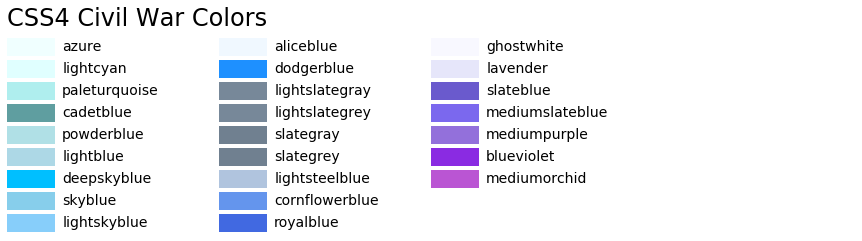

In [70]:

plot_colortable(colors_dict={name: color for name, color in mcolors.CSS4_COLORS.items() if name in css4_civil_war_list},
                title='CSS4 Civil War Colors', sort_colors=True, emptycols=1)

[(0.42093431531360703, 'cadetblue'), (0.4610053704210976, 'powderblue'), (0.46422992089486875, 'skyblue'), (0.4656191902145357, 'lightblue')]


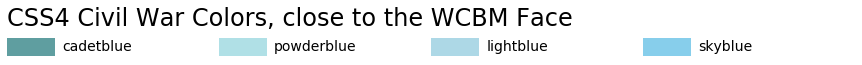

In [191]:

color_tuple_list = sorted((distance, name) for name, distance in css4_wcbm_civil_war_dict.items())
test_list = color_tuple_list[:4]
saeculum_title = 'Civil War'
face_title = 'WCBM'
nearness_str = 'close to'
display_test_colors(test_list, saeculum_title, face_title, nearness_str, color_dict=mcolors.CSS4_COLORS, color_title='CSS4')

[(0.42093431531360703, 'cadetblue'), (0.4610053704210976, 'powderblue'), (0.46422992089486875, 'skyblue'), (0.4656191902145357, 'lightblue'), (0.4763616433183024, 'paleturquoise'), (0.4764907604864043, 'lightsteelblue'), (0.47842333648024415, 'lightslategray'), (0.47842333648024415, 'lightslategrey'), (0.5058899528232904, 'slategray'), (0.5058899528232904, 'slategrey'), (0.5182334765126553, 'lightskyblue'), (0.6073052648682042, 'cornflowerblue')]


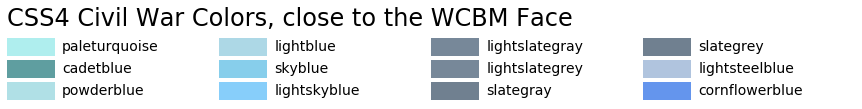

In [192]:

color_tuple_list = sorted((distance, name) for name, distance in css4_wcbm_civil_war_dict.items())
test_list = color_tuple_list[:12]
saeculum_title = 'Civil War'
face_title = 'WCBM'
nearness_str = 'close to'
display_test_colors(test_list, saeculum_title, face_title, nearness_str, color_dict=mcolors.CSS4_COLORS, color_title='CSS4')

[(0.6340037731068525, 'lavender'), (0.6668108263973314, 'azure'), (0.6673756322530683, 'aliceblue'), (0.6701351525215913, 'mediumpurple'), (0.6885173434684302, 'ghostwhite'), (0.719834873627468, 'slateblue'), (0.7339883831226593, 'mediumslateblue'), (0.7431605356175384, 'royalblue'), (0.7503273667188294, 'deepskyblue'), (0.7652938915765819, 'dodgerblue'), (0.7773662886887341, 'mediumorchid'), (0.9176512485240369, 'blueviolet')]


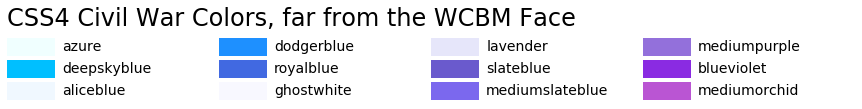

In [193]:

color_tuple_list = sorted((distance, name) for name, distance in css4_wcbm_civil_war_dict.items())
test_list = color_tuple_list[-12:]
saeculum_title = 'Civil War'
face_title = 'WCBM'
nearness_str = 'far from'
display_test_colors(test_list, saeculum_title, face_title, nearness_str, color_dict=mcolors.CSS4_COLORS, color_title='CSS4')

In [179]:

css4_wcgy_great_power_dict = {name: distance_from_wcgy_face(mcolors.to_rgb(color)) for name,
                              color in mcolors.CSS4_COLORS.items() if name in css4_great_power_list}
color_tuple_list = sorted((distance, name) for name, distance in css4_wcgy_great_power_dict.items())

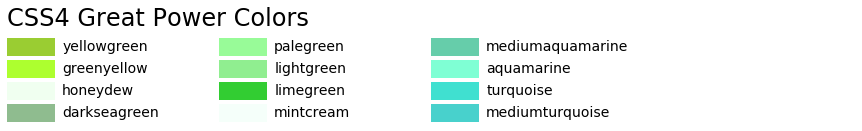

In [71]:

plot_colortable(colors_dict={name: color for name, color in mcolors.CSS4_COLORS.items() if name in css4_great_power_list},
                title='CSS4 Great Power Colors', sort_colors=True, emptycols=1)

[(0.5028867072901101, 'darkseagreen'), (0.584478197670777, 'yellowgreen'), (0.6176128219580468, 'lightgreen'), (0.6379212202738385, 'palegreen')]


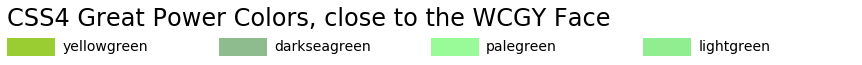

In [180]:

test_list = color_tuple_list[:4]
saeculum_title = 'Great Power'
face_title = 'WCGY'
nearness_str = 'close to'
display_test_colors(test_list, saeculum_title, face_title, nearness_str, color_dict=mcolors.CSS4_COLORS, color_title='CSS4')

[(0.7821588043566363, 'aquamarine'), (0.8409319083213043, 'mediumturquoise'), (0.8966038704894717, 'turquoise'), (0.9116065644006531, 'limegreen')]


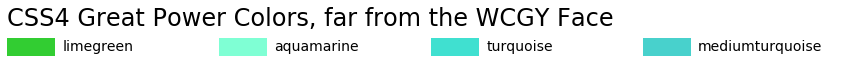

In [181]:

test_list = color_tuple_list[-4:]
saeculum_title = 'Great Power'
face_title = 'WCGY'
nearness_str = 'far from'
display_test_colors(test_list, saeculum_title, face_title, nearness_str, color_dict=mcolors.CSS4_COLORS, color_title='CSS4')

In [182]:

css4_wyrm_millennial_dict = {name: distance_from_wyrm_face(mcolors.to_rgb(color)) for name,
                             color in mcolors.CSS4_COLORS.items() if name in css4_millennial_list}
color_tuple_list = sorted((distance, name) for name, distance in css4_wyrm_millennial_dict.items())

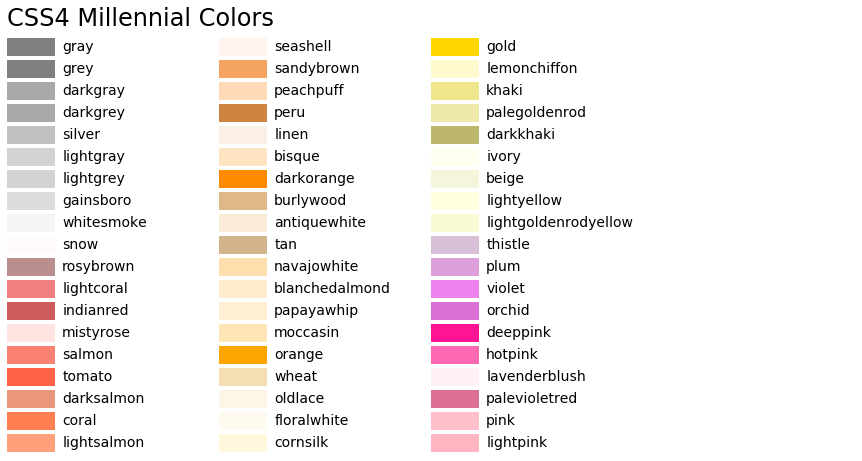

In [72]:

plot_colortable(colors_dict={name: color for name, color in mcolors.CSS4_COLORS.items() if name in css4_millennial_list},
                title='CSS4 Millennial Colors', sort_colors=True, emptycols=1)

[(0.39433707675516155, 'orchid'), (0.40830479150772414, 'darkgray'), (0.40830479150772414, 'darkgrey'), (0.41044606786415216, 'plum')]


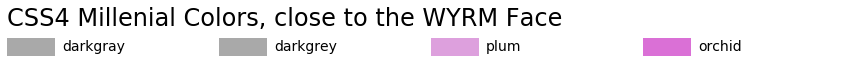

In [183]:

test_list = color_tuple_list[:4]
saeculum_title = 'Millenial'
face_title = 'WYRM'
nearness_str = 'close to'
display_test_colors(test_list, saeculum_title, face_title, nearness_str, color_dict=mcolors.CSS4_COLORS, color_title='CSS4')

[(0.8849591140851992, 'tomato'), (1.1191080921667464, 'darkorange'), (1.1276640889812244, 'orange'), (1.1695055261526783, 'gold')]


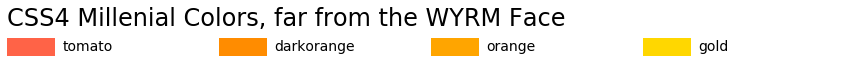

In [184]:

test_list = color_tuple_list[-4:]
saeculum_title = 'Millenial'
face_title = 'WYRM'
nearness_str = 'far from'
display_test_colors(test_list, saeculum_title, face_title, nearness_str, color_dict=mcolors.CSS4_COLORS, color_title='CSS4')

[(0.39433707675516155, 'orchid'), (0.4385411486968424, 'violet'), (0.49804693524973065, 'grey'), (0.5919815348804128, 'tan')]


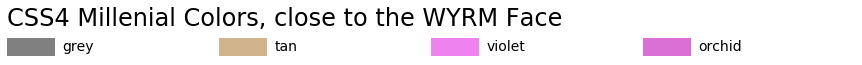

In [185]:

test_list = color_tuple_list[:20:5]
saeculum_title = 'Millenial'
face_title = 'WYRM'
nearness_str = 'close to'
display_test_colors(test_list, saeculum_title, face_title, nearness_str, color_dict=mcolors.CSS4_COLORS, color_title='CSS4')

In [53]:

columns_list = ['saeculum_name', 'generation_name']
mask_series = (patriline_df.saeculum_name == 'Reformation')
patriline_df[mask_series][columns_list]

,saeculum_name,generation_name
patriarch_name,,
Stephen Elkanah Babbitt,Millennial,Millennial
David George Babbitt,Millennial,13th
"Joseph Robert Babbitt, Jr.",Great Power,Silent
"Joseph Robert Babbitt, Sr.",Great Power,Lost
"David William Babbitt, Jr.",Civil War,Progressive
"David William Babbitt, Sr.",Civil War,Transcendental
William David Babbitt,Revolutionary,Compromise
David Babbitt,Revolutionary,Republican
"Elkanah Babbitt, IV",Revolutionary,Liberty


In [54]:

patriline_df = load_object('patriline_df')
patriline_df['css4_color'] = pd.np.nan

# Millennial
mask_series = (patriline_df.index == 'Stephen Elkanah Babbitt')
patriline_df.loc[mask_series, 'css4_color'] = 'aqua'
mask_series = (patriline_df.index == 'David George Babbitt')
patriline_df.loc[mask_series, 'css4_color'] = 'darkturquoise'

# Great Power
mask_series = (patriline_df.index == 'Joseph Robert Babbitt, Jr.')
patriline_df.loc[mask_series, 'css4_color'] = 'yellow'
mask_series = (patriline_df.index == 'Joseph Robert Babbitt, Sr.')
patriline_df.loc[mask_series, 'css4_color'] = 'gold'

# Civil War
mask_series = (patriline_df.index == 'David William Babbitt, Jr.')
patriline_df.loc[mask_series, 'css4_color'] = 'fuchsia'
mask_series = (patriline_df.index == 'David William Babbitt, Sr.')
patriline_df.loc[mask_series, 'css4_color'] = 'darkviolet'

# Revolutionary
mask_series = (patriline_df.index == 'William David Babbitt')
patriline_df.loc[mask_series, 'css4_color'] = 'blue'
mask_series = (patriline_df.index == 'David Babbitt')
patriline_df.loc[mask_series, 'css4_color'] = 'darkblue'
mask_series = (patriline_df.index == 'Elkanah Babbitt, IV')
patriline_df.loc[mask_series, 'css4_color'] = 'royalblue'
mask_series = (patriline_df.index == 'Elkanah Babbitt, III')
patriline_df.loc[mask_series, 'css4_color'] = 'indigo'

# New World
mask_series = (patriline_df.index == 'Elkanah Babbitt, II')
patriline_df.loc[mask_series, 'css4_color'] = 'lime'
mask_series = (patriline_df.index == 'Elkanah Babbitt, I')
patriline_df.loc[mask_series, 'css4_color'] = 'forestgreen'
mask_series = (patriline_df.index == 'Edward Bobet')
patriline_df.loc[mask_series, 'css4_color'] = 'chartreuse'

# Reformation
mask_series = (patriline_df.index == 'Thomas Bobbet')
patriline_df.loc[mask_series, 'css4_color'] = 'red'
mask_series = (patriline_df.index == '(No Name), Jr.')
patriline_df.loc[mask_series, 'css4_color'] = 'firebrick'
mask_series = (patriline_df.index == '(No Name), Sr.')
patriline_df.loc[mask_series, 'css4_color'] = 'tomato'
store_objects(patriline_df=patriline_df)

Pickling to D:\Documents\Repositories\notebooks\Strauss–Howe\saves\pickle\patriline_df.pickle


In [63]:

patriline_df = load_object('patriline_df')
patriline_df['xkcd_text_color'] = pd.np.nan
patriline_df['css4_text_color'] = pd.np.nan

patriline_df = patriline_df.apply(get_shortest_distance, axis=1)
store_objects(patriline_df=patriline_df)

Pickling to D:\Documents\Repositories\notebooks\Strauss–Howe\saves\pickle\patriline_df.pickle


In [64]:

columns_list = ['xkcd_color', 'css4_color', 'xkcd_text_color', 'css4_text_color']
patriline_df[columns_list]

,xkcd_color,css4_color,xkcd_text_color,css4_text_color
patriarch_name,,,,
Stephen Elkanah Babbitt,xkcd:cyan,aqua,black,black
David George Babbitt,xkcd:aqua blue,darkturquoise,black,black
"Joseph Robert Babbitt, Jr.",xkcd:bright yellow,yellow,black,black
"Joseph Robert Babbitt, Sr.",xkcd:dandelion,gold,black,black
"David William Babbitt, Jr.",xkcd:bright magenta,fuchsia,black,black
"David William Babbitt, Sr.",xkcd:bright purple,darkviolet,black,white
William David Babbitt,xkcd:primary blue,blue,white,white
David Babbitt,xkcd:ultramarine blue,darkblue,white,white
"Elkanah Babbitt, IV",xkcd:light royal blue,royalblue,white,black



# Base

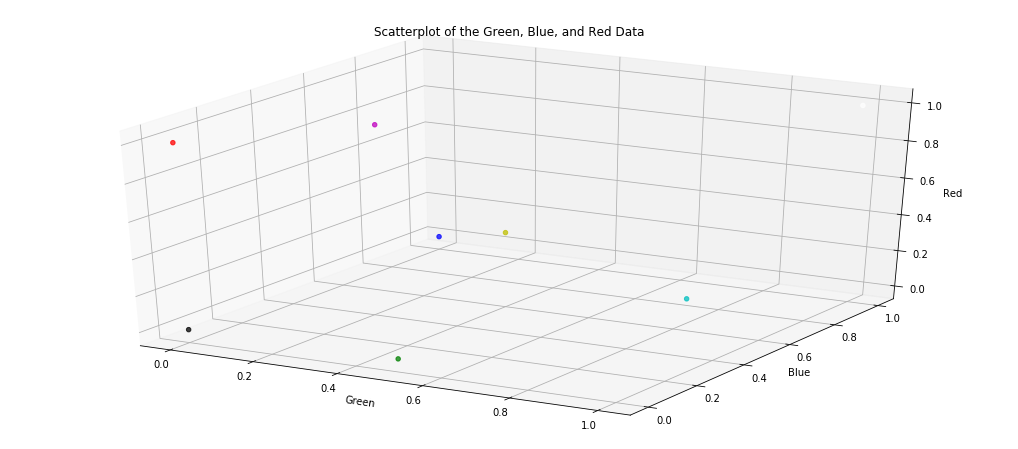

In [44]:

colors_dict = {name: mcolors.to_rgb(color) for name, color in mcolors.BASE_COLORS.items()}
base_colors_df = colors_dict_to_dataframe(colors_dict)
show_3d_plot(base_colors_df)

In [46]:

base_reformation_list = []
base_new_world_list = []
base_revolutionary_list = []
base_civil_war_list = []
base_great_power_list = []
base_millennial_list = []
base_distance_df = get_distance_dataframe(base_colors_df, color_title='Base')
base_face_dictionary = get_face_dictionary(base_distance_df)
for key, value in base_face_dictionary.items():
    if value == 'black-blue-cyan-green':
        base_reformation_list .append(key)
    elif value == 'black-red-magenta-blue':
        base_new_world_list .append(key)
    elif value == 'black-red-yellow-green':
        base_revolutionary_list .append(key)
    elif value == 'white-cyan-blue-magenta':
        base_civil_war_list .append(key)
    elif value == 'white-cyan-green-yellow':
        base_great_power_list .append(key)
    elif value == 'white-yellow-red-magenta':
        base_millennial_list .append(key)

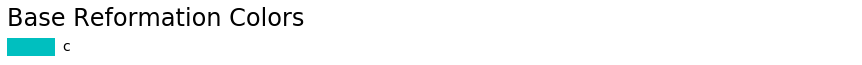

In [47]:

plot_colortable(colors_dict={name: color for name, color in mcolors.BASE_COLORS.items() if name in base_reformation_list},
                title='Base Reformation Colors', sort_colors=True, emptycols=1)

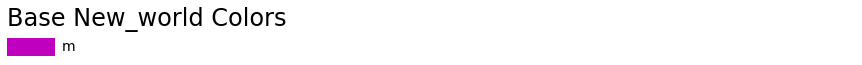

In [48]:

plot_colortable(colors_dict={name: color for name, color in mcolors.BASE_COLORS.items() if name in base_new_world_list},
                title='Base New_world Colors', sort_colors=True, emptycols=1)

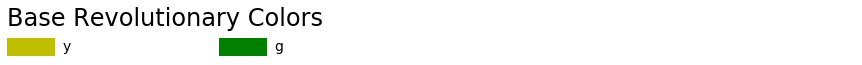

In [49]:

plot_colortable(colors_dict={name: color for name, color in mcolors.BASE_COLORS.items() if name in base_revolutionary_list},
                title='Base Revolutionary Colors', sort_colors=True, emptycols=1)

In [77]:

plot_colortable(colors_dict={name: color for name, color in mcolors.BASE_COLORS.items() if name in base_civil_war_list},
                title='Base Civil_war Colors', sort_colors=True, emptycols=1)

In [78]:

plot_colortable(colors_dict={name: color for name, color in mcolors.BASE_COLORS.items() if name in base_great_power_list},
                title='Base Great_power Colors', sort_colors=True, emptycols=1)

In [79]:

plot_colortable(colors_dict={name: color for name, color in mcolors.BASE_COLORS.items() if name in base_millennial_list},
                title='Base Millennial Colors', sort_colors=True, emptycols=1)

In [53]:

show_face_proximity(base_distance_df)

b is in the blue corner
g is nearest the black-red-yellow-green face
r is in the red corner
c is nearest the black-blue-cyan-green face
m is nearest the black-red-magenta-blue face
y is nearest the black-red-yellow-green face
k is in the black corner
w is in the white corner


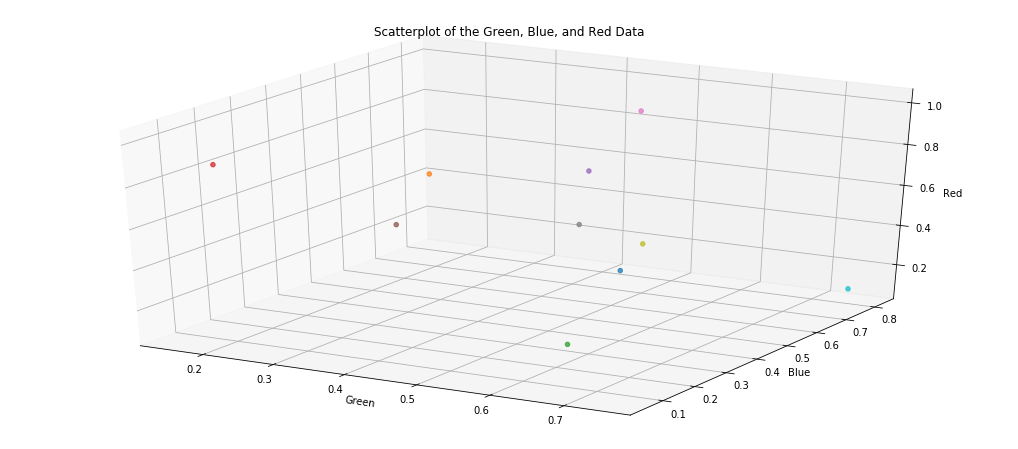

In [54]:

colors_dict = {name: mcolors.to_rgb(color) for name, color in mcolors.TABLEAU_COLORS.items()}
tab_colors_df = colors_dict_to_dataframe(colors_dict)
show_3d_plot(tab_colors_df)

In [55]:

tab_reformation_list = []
tab_new_world_list = []
tab_revolutionary_list = []
tab_civil_war_list = []
tab_great_power_list = []
tab_millennial_list = []
tab_distance_df = get_distance_dataframe(tab_colors_df, color_title='Tableau')
tab_face_dictionary = get_face_dictionary(tab_distance_df)
for key, value in tab_face_dictionary.items():
    if value == 'black-blue-cyan-green':
        tab_reformation_list .append(key)
    elif value == 'black-red-magenta-blue':
        tab_new_world_list .append(key)
    elif value == 'black-red-yellow-green':
        tab_revolutionary_list .append(key)
    elif value == 'white-cyan-blue-magenta':
        tab_civil_war_list .append(key)
    elif value == 'white-cyan-green-yellow':
        tab_great_power_list .append(key)
    elif value == 'white-yellow-red-magenta':
        tab_millennial_list .append(key)

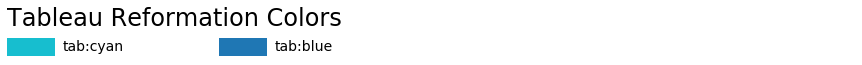

In [56]:

plot_colortable(colors_dict={name: color for name, color in mcolors.TABLEAU_COLORS.items() if name in tab_reformation_list},
                title='Tableau Reformation Colors', sort_colors=True, emptycols=1)

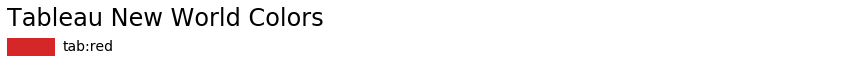

In [81]:

plot_colortable(colors_dict={name: color for name, color in mcolors.TABLEAU_COLORS.items() if name in tab_new_world_list},
                title='Tableau New World Colors', sort_colors=True, emptycols=1)

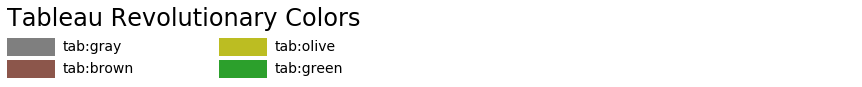

In [58]:

plot_colortable(colors_dict={name: color for name, color in mcolors.TABLEAU_COLORS.items() if name in tab_revolutionary_list},
                title='Tableau Revolutionary Colors', sort_colors=True, emptycols=1)

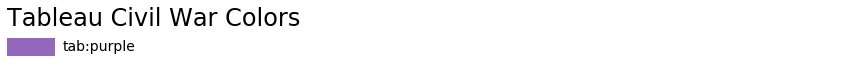

In [82]:

plot_colortable(colors_dict={name: color for name, color in mcolors.TABLEAU_COLORS.items() if name in tab_civil_war_list},
                title='Tableau Civil War Colors', sort_colors=True, emptycols=1)

In [80]:

plot_colortable(colors_dict={name: color for name, color in mcolors.TABLEAU_COLORS.items() if name in tab_great_power_list},
                title='Tableau Great Power Colors', sort_colors=True, emptycols=1)

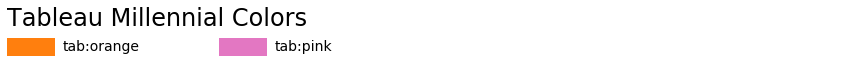

In [61]:

plot_colortable(colors_dict={name: color for name, color in mcolors.TABLEAU_COLORS.items() if name in tab_millennial_list},
                title='Tableau Millennial Colors', sort_colors=True, emptycols=1)

In [251]:

xkcd_distance_df = get_distance_dataframe(xkcd_colors_df, color_title='XKCD')
css4_distance_df = get_distance_dataframe(css4_colors_df, color_title='CSS4')
base_distance_df = get_distance_dataframe(base_colors_df, color_title='Base')
tab_distance_df = get_distance_dataframe(tab_colors_df, color_title='Tableau')

In [263]:

columns_list = ['color_title', 'distance_from_white', 'distance_from_black', 'distance_from_red', 'distance_from_green', 'distance_from_blue',
                'distance_from_magenta', 'distance_from_yellow', 'distance_from_cyan', 'distance_from_kryg_face',
                'distance_from_krmb_face', 'distance_from_kbcg_face', 'distance_from_wcgy_face', 'distance_from_wcbm_face',
                'distance_from_wyrm_face']
merge_df = xkcd_distance_df.merge(right=css4_distance_df, how='outer', on=columns_list, left_index=True, right_index=True,
                                  suffixes=('_xkcd', '_css4'))
merge_df = merge_df.merge(right=base_distance_df, how='outer', on=columns_list, left_index=True, right_index=True, suffixes=('_merge', '_base'))
colors_distance_df = merge_df.merge(right=tab_distance_df, how='outer', on=columns_list, left_index=True, right_index=True,
                                    suffixes=('_merge', '_tab'))
store_objects(colors_distance_df=colors_distance_df)
colors_distance_df.T.sample(8).T

Pickling to C:\Users\dev\Documents\repositories\notebooks\Strauss–Howe\saves\pickle\colors_distance_df.pickle


,distance_from_yellow,distance_from_white,distance_from_black,distance_from_green,distance_from_kbcg_face,distance_from_cyan,distance_from_wcgy_face,distance_from_wyrm_face
aliceblue,1.0021,0.0649135,1.68276,1.37352,1.16581,0.941577,0.667376,0.69048
antiquewhite,0.847004,0.176471,1.58787,1.29545,1.121,0.995955,0.595543,0.543919
aqua,1.41421,1,1.41421,1,0.707107,0,0.707107,1.22474
aquamarine,0.971156,0.529528,1.39256,0.969135,0.779648,0.525812,0.331378,0.782159
azure,1.00173,0.0588235,1.69877,1.37325,1.17721,0.941176,0.666811,0.709549
...,...,...,...,...,...,...,...,...
xkcd:yellowy brown,0.556821,1.10269,0.874615,0.821435,0.820241,1.25723,0.667341,0.555058
xkcd:yellowy green,0.301017,0.881411,1.21608,0.767236,0.936422,1.12913,0.427514,0.615505
y,0.353553,1.06066,1.06066,0.790569,0.935414,1.27475,0.612372,0.612372
yellow,0,1,1.41421,1,1.22474,1.41421,0.707107,0.707107


In [264]:

colors_distance_df.color_title.unique()

array(['CSS4', 'Base', 'Tableau', 'XKCD'], dtype=object)

In [269]:

mask_series = (colors_distance_df.color_title == 'CSS4')
css4_set = set(colors_distance_df[mask_series].index.tolist())
print(css4_set)
mask_series = (colors_distance_df.color_title == 'Tableau')
tab_set = set(colors_distance_df[mask_series].index.tolist())
print(tab_set)
tab_set.intersection(css4_set)

{'dimgray', 'lightgrey', 'navy', 'thistle', 'chocolate', 'lightslategrey', 'crimson', 'moccasin', 'springgreen', 'palegoldenrod', 'lightgray', 'olivedrab', 'darkturquoise', 'pink', 'saddlebrown', 'deepskyblue', 'chartreuse', 'whitesmoke', 'honeydew', 'khaki', 'aquamarine', 'burlywood', 'lightseagreen', 'palegreen', 'darkkhaki', 'mediumblue', 'slategrey', 'lemonchiffon', 'white', 'mediumslateblue', 'dodgerblue', 'darkmagenta', 'steelblue', 'floralwhite', 'darkorange', 'cadetblue', 'lightslategray', 'royalblue', 'powderblue', 'limegreen', 'slategray', 'linen', 'cyan', 'mediumspringgreen', 'lightskyblue', 'firebrick', 'seagreen', 'sandybrown', 'antiquewhite', 'lightyellow', 'blueviolet', 'snow', 'lightsteelblue', 'skyblue', 'gray', 'maroon', 'red', 'rebeccapurple', 'tan', 'orangered', 'tomato', 'indianred', 'midnightblue', 'darkseagreen', 'lavenderblush', 'palevioletred', 'peru', 'lightgreen', 'papayawhip', 'navajowhite', 'forestgreen', 'darkslategrey', 'cornsilk', 'blue', 'aliceblue', 'g

set()

In [272]:

patriline_df.columns = ['year_of_birth', 'year_of_death', 'generation_name', 'date_of_birth', 'place_of_birth', 'birth_longitude', 'birth_latitude', 'date_of_death',
                        'place_of_death', 'death_longitude', 'death_latitude', 'saeculum_name']
store_objects(patriline_df=patriline_df)

Pickling to C:\Users\dev\Documents\repositories\notebooks\Strauss–Howe\saves\pickle\patriline_df.pickle


In [283]:

columns_list = ['saeculum_name', 'generation_name']
patriline_groupby = patriline_df.groupby(columns_list, sort=False)
print([fn for fn in dir(patriline_groupby) if ('sort' in fn.lower()) or ('order' in fn.lower())])
patriline_groupby.year_of_birth.count()
patriline_df[columns_list]
store_objects(patriline_df=patriline_df)

['_set_result_index_ordered']


,saeculum_name,generation_name
patriarch_name,,
Stephen Elkanah Babbitt,Millennial,Millennial
David George Babbitt,Millennial,13th
"Joseph Robert Babbitt, Jr.",Great Power,Silent
"Joseph Robert Babbitt, Sr.",Great Power,Lost
"David William Babbitt, Jr.",Civil War,Progressive
"David William Babbitt, Sr.",Civil War,Transcendental
William David Babbitt,Revolutionary,Compromise
David Babbitt,Revolutionary,Republican
"Elkanah Babbitt, IV",Revolutionary,Liberty


In [270]:

generations_df.columns

Index(['childhood_turning_entered', 'saeculum_name', 'turnings_archetype',
       'generations_archetype', 'birth_year_begin', 'birth_year_end',
       'childhood_turning_description', 'turning_year_begin',
       'turning_year_end'],
      dtype='object')

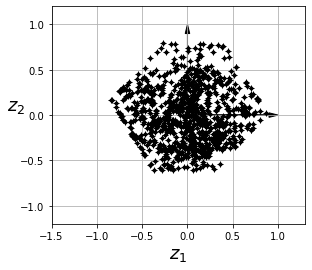

In [73]:

X = xkcd_colors_df.values
X2D = PCA(n_components=2).fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], 'k+')
ax.plot(X2D[:, 0], X2D[:, 1], 'k.')
ax.plot([0], [0], 'ko')
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel('$z_1$', fontsize=18)
ax.set_ylabel('$z_2$', fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)

In [ ]:

eps = 0.09
min_samples = 1
db = DBSCAN(eps=eps, min_samples=min_samples).fit(X2D)
labels_ndarray = db.labels_
unique_labels = np.unique(labels_ndarray)
unique_labels_count = len(unique_labels)
if (unique_labels_count > 4) and (unique_labels_count < 8):
    print('np.unique(DBSCAN(eps={}, min_samples={}).fit(pca_ndarray).labels_) = {}'.format(eps, min_samples, unique_labels))

In [ ]:

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, autoscale_on=True)
cmap = plt.get_cmap('viridis_r')
path_collection = ax.scatter(X2D[:, 0], X2D[:, 1],
                             c=labels_ndarray, edgecolors=(0, 0, 0), cmap=cmap)
title_text = 'Dimension Reduced Scatterplot of the XKCD Colors'
text = plt.title(title_text)
xticklabel_obj = plt.xticks([])
yticklabel_obj = plt.yticks([])

In [ ]:

# Optionally plot the XKCD colors (Caution: will produce large figure)
file_name = 'XKCD_Colors.png'
png_folder = os.path.join(SAVES_FOLDER, 'png')
file_path = os.path.join(png_folder, file_name)
xkcd_fig = plot_colortable(mcolors.XKCD_COLORS, "XKCD Colors")
xkcd_fig.savefig(file_path)